In [443]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from turtle import color
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

# **| Trabajo sobre México**

In [444]:
resultados = {}

# Entire home/apt

In [ ]:
#Cargar desde un archivo .csv
Mexico_EH = pd.read_csv('room_type_México/Entire_homeapt_México.csv')

Mexico_EH.head()

,last_scraped,source,name,description,neighborhood_overview,host_name,host_since,host_location,host_about,host_response_time,...,availability_365,number_of_reviews,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,2024-09-23,city scrape,"3 bedrooms, 2 bathrooms, 2nd floor with elevator",The apartment is 3-bedroom apartment with 2-ba...,Ampelokipi district is nice multinational and ...,Emmanouil,2009-09-08,"Athens, Greece",Athens Quality Apartments is a company started...,within an hour,...,340,53.0,0.0,4.87,4.89,4.85,4.91,4.58,4.75,0.33
1,2024-09-23,city scrape,Athens Quality Apartments - Deluxe Apartment,Athens Quality Apartments - Deluxe apartment i...,Ampelokipi district is nice multinational and ...,Emmanouil,2009-09-08,"Athens, Greece",Athens Quality Apartments is a company started...,within an hour,...,350,82.0,0.0,4.83,4.85,4.85,4.90,4.80,4.75,0.56
2,2024-09-23,city scrape,Athens Quality Apartments - Studio,The Studio is an <br />-excellent located <br ...,Ampelokipi district is nice multinational and ...,Emmanouil,2009-09-08,"Athens, Greece",Athens Quality Apartments is a company started...,within an hour,...,341,107.0,0.0,4.85,4.92,4.93,4.97,4.79,4.78,0.73
3,2024-09-23,city scrape,"AQA-No2 1-bedroom, smart tv, fiber connection,","AQA No2 is 1-bedroom apartment (47m2), on the ...",Ampelokipi district is nice multinational and ...,Emmanouil,2009-09-08,"Athens, Greece",Athens Quality Apartments is a company started...,within an hour,...,350,36.0,0.0,4.83,4.97,4.91,4.89,4.82,4.82,0.21
4,2024-09-23,city scrape,"AQA-No7, Great mattress, high speed internet",THE MATTRESS - KING KOIL - Camden Luxury 160x2...,No disponible,Emmanouil,2009-09-08,"Athens, Greece",Athens Quality Apartments is a company started...,within an hour,...,358,25.0,0.0,4.84,4.88,4.96,4.96,4.75,4.71,0.17


In [ ]:
Mexico_EH.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13001 entries, 0 to 13000
Data columns (total 50 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   last_scraped                 13001 non-null  object 
 1   source                       13001 non-null  object 
 2   name                         13001 non-null  object 
 3   description                  13001 non-null  object 
 4   neighborhood_overview        13001 non-null  object 
 5   host_name                    13001 non-null  object 
 6   host_since                   13001 non-null  object 
 7   host_location                13001 non-null  object 
 8   host_about                   13001 non-null  object 
 9   host_response_time           13001 non-null  object 
 10  host_is_superhost            13001 non-null  object 
 11  host_verifications           13001 non-null  object 
 12  host_identity_verified       13001 non-null  object 
 13  neighbourhood_cl

In [ ]:
# Variables binarias: Convertir "yes" -> 1, "no" -> 0
binary_vars = ["host_is_superhost", "host_identity_verified", "instant_bookable"]
for var in binary_vars:
    Mexico_EH[var] = Mexico_EH[var].map({'t': 1, 'f': 0})  # 't' (true) y 'f' (false) en el dataset

In [ ]:
# Convertir "property_type" en variables numéricas label encoding
le = LabelEncoder()
Mexico_EH["property_type_encoded"] = le.fit_transform(Mexico_EH["property_type"])

In [449]:
comparaciones = [
    ("price", "host_acceptance_rate"),
    ("price", "host_is_superhost"),
    ("accommodates", "bathrooms"),
    ("price", "review_scores_cleanliness"),
    ("price", "host_identity_verified"),
    ("price", "instant_bookable")
]

<Axes: xlabel='host_acceptance_rate', ylabel='price'>

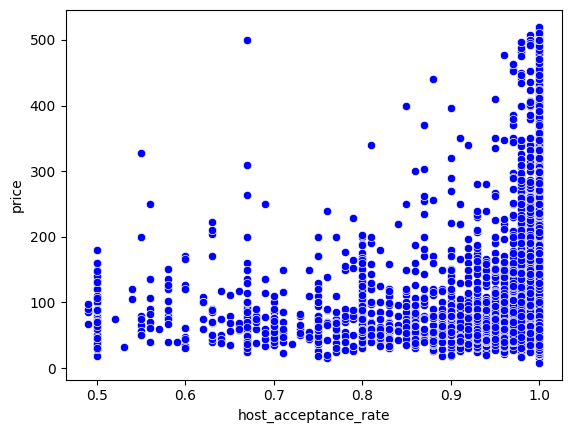

In [ ]:
#Imprimimos el scater plot entre la variable dependiente e independiente 
#para observar el comportamiento en su dispersión

#(price vs host_acceptance_rate)
sns.scatterplot(x='host_acceptance_rate', y='price', color="blue", data=Mexico_EH)


<Axes: xlabel='host_is_superhost', ylabel='price'>

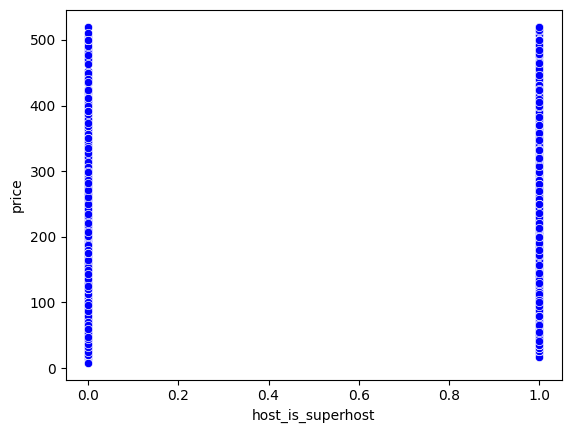

In [ ]:
#(price vs host_is_superhost)
sns.scatterplot(x='host_is_superhost', y='price', color="blue", data=Mexico_EH)

<Axes: xlabel='bathrooms', ylabel='accommodates'>

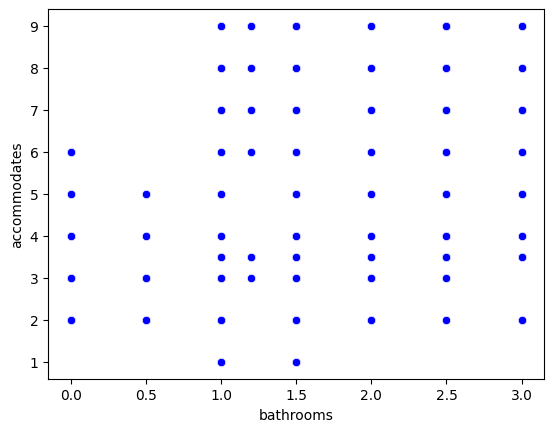

In [ ]:
#(accommodates vs bathrooms)
sns.scatterplot(x='bathrooms', y='accommodates', color="blue", data=Mexico_EH)


<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

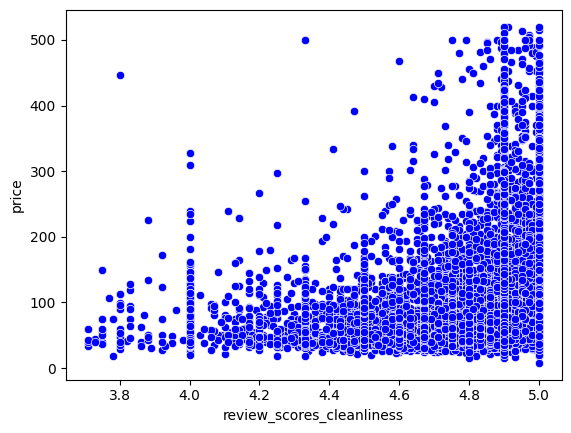

In [ ]:
#(price vs review_scores_cleanliness)
sns.scatterplot(x='review_scores_cleanliness', y='price', color="blue", data=Mexico_EH)

<Axes: xlabel='host_identity_verified', ylabel='price'>

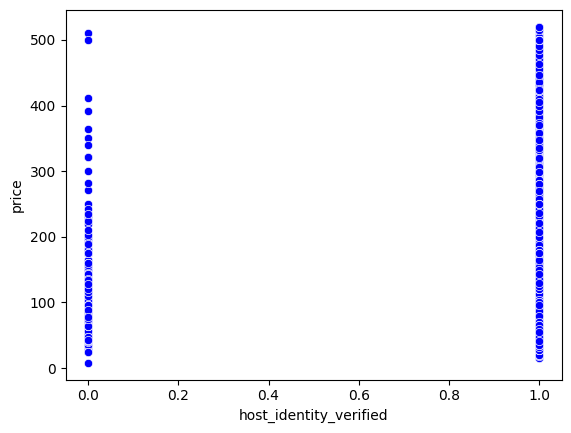

In [ ]:
#(price vs host_identity_verified)
sns.scatterplot(x='host_identity_verified', y='price', color="blue", data=Mexico_EH)

<Axes: xlabel='instant_bookable', ylabel='price'>

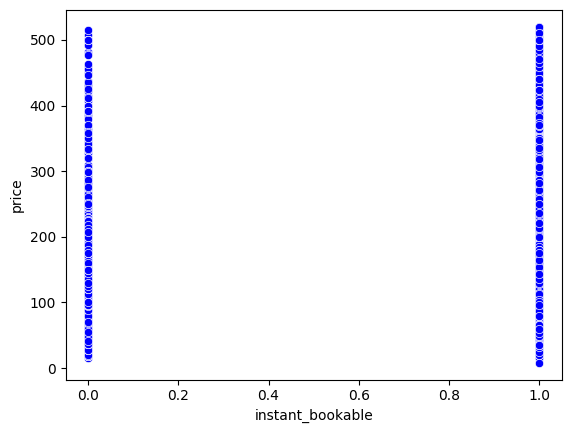

In [ ]:
#(price vs instant_bookable)
sns.scatterplot(x='instant_bookable', y='price', color="blue", data=Mexico_EH)

<Axes: xlabel='property_type_encoded', ylabel='price'>

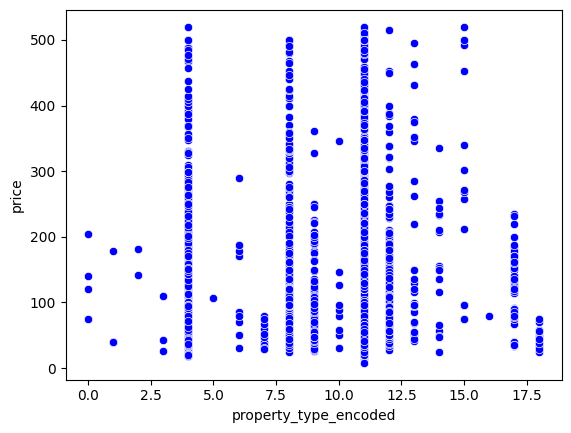

In [ ]:
#(price vs property_type)
sns.scatterplot(x='property_type_encoded', y='price', color="blue", data=Mexico_EH)


**| price vs host_acceptance_rate**

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
vars_Indep = Mexico_EH[['host_acceptance_rate']] 
var_Dep = Mexico_EH['price']

In [458]:
model = LinearRegression()
type(model)

sklearn.linear_model._base.LinearRegression

In [459]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=vars_Indep, y=var_Dep)

LinearRegression()

In [460]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([63.66456163]),
 'rank_': 1,
 'singular_': array([7.50851209]),
 'intercept_': np.float64(33.224470261889834)}

Modelo Matematico

In [461]:
#Coeficiente de determinación
model.score(vars_Indep, var_Dep)

0.0038328398163844923

In [ ]:
#Predecimos los valores 
y_pred = model.predict(X=Mexico_EH[['host_acceptance_rate']])
y_pred

array([96.8890319, 96.8890319, 96.8890319, ..., 96.8890319, 89.2492845,
       89.2492845], shape=(13001,))

In [ ]:
#Insertamos la columna de predicciones en el dataframe
Mexico_EH.insert(32, 'Predicciones_price_host_acceptance_rate', y_pred)


<Axes: xlabel='host_acceptance_rate', ylabel='price'>

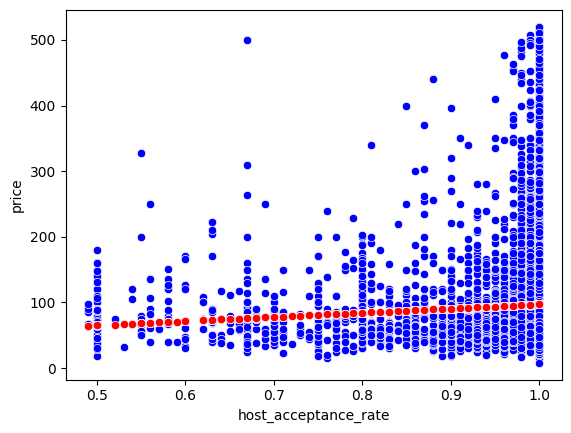

In [ ]:
#Visualizamos la grafica comparativa entre el total real y el total predecido
sns.scatterplot(x='host_acceptance_rate', y='price', color="blue", data=Mexico_EH)
sns.scatterplot(x='host_acceptance_rate', y='Predicciones_price_host_acceptance_rate', color="red", data=Mexico_EH)
#sns.lineplot(x='host_acceptance_rate', y='Predicciones_price_host_acceptance_rate', color="red", data=Mexico_EH)

In [465]:
#Corroboramos cual es el coeficiente de determinacion de nuestro modelo
coef_Deter = model.score(vars_Indep, var_Dep)
coef_Deter

0.0038328398163844923

In [466]:
#Corroboramos cual es el coeficiente de correlacion de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

np.float64(0.06190993309949941)

**| price vs host_is_superhost**

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
vars_Indep = Mexico_EH[['host_is_superhost']] 
var_Dep = Mexico_EH['price']

In [468]:
model = LinearRegression()
type(model)

sklearn.linear_model._base.LinearRegression

In [469]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=vars_Indep, y=var_Dep)

LinearRegression()

In [470]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_is_superhost'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([16.15001115]),
 'rank_': 1,
 'singular_': array([55.96837125]),
 'intercept_': np.float64(88.94081157921921)}

Modelo Matematico

In [471]:
#Coeficiente de determinación
model.score(vars_Indep, var_Dep)

0.013704032626355445

In [ ]:
#Predecimos los valores 
y_pred = model.predict(X=Mexico_EH[['host_is_superhost']])
y_pred

array([105.09082272, 105.09082272, 105.09082272, ...,  88.94081158,
       105.09082272, 105.09082272], shape=(13001,))

In [ ]:
#Insertamos la columna de predicciones en el dataframe
Mexico_EH.insert(32, 'Predicciones_price_host_is_superhost', y_pred)


<Axes: xlabel='host_is_superhost', ylabel='price'>

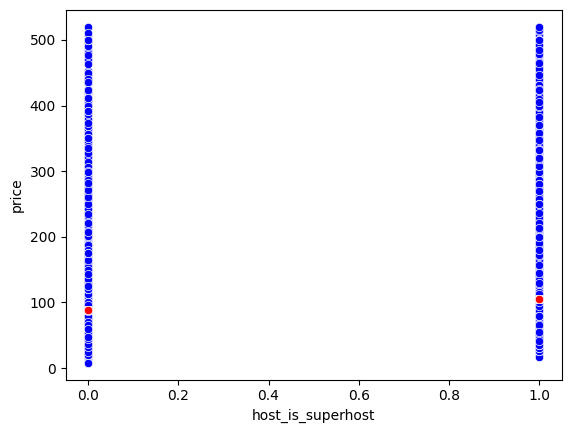

In [ ]:
#Visualizamos la grafica comparativa entre el total real y el total predecido
sns.scatterplot(x='host_is_superhost', y='price', color="blue", data=Mexico_EH)
sns.scatterplot(x='host_is_superhost', y='Predicciones_price_host_is_superhost', color="red", data=Mexico_EH)
#sns.lineplot(x='price', y='Predicciones_price_host_is_superhost', color="red", data=Mexico_EH)

In [475]:
#Corroboramos cual es el coeficiente de determinacion de nuestro modelo
coef_Deter = model.score(vars_Indep, var_Dep)
resultados[("Entire_homeapt","price_host_is_superhost","determinacion")] = coef_Deter
coef_Deter

0.013704032626355445

In [476]:
#Corroboramos cual es el coeficiente de correlacion de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
resultados[("Entire_homeapt","price_host_is_superhost","correlacion")] = coef_Correl
coef_Correl

np.float64(0.11706422436575337)

**| accommodates vs bathrooms**

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
vars_Indep = Mexico_EH[['bathrooms']] 
var_Dep = Mexico_EH['accommodates']

In [478]:
model = LinearRegression()
type(model)

sklearn.linear_model._base.LinearRegression

In [479]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=vars_Indep, y=var_Dep)

LinearRegression()

In [480]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['bathrooms'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([1.6948482]),
 'rank_': 1,
 'singular_': array([43.89470798]),
 'intercept_': np.float64(1.6924475028297)}

Modelo Matematico

In [481]:
#Coeficiente de determinación
model.score(vars_Indep, var_Dep)

0.18644204258501607

In [ ]:
#Predecimos los valores 
y_pred = model.predict(X=Mexico_EH[['bathrooms']])
y_pred

array([5.08214391, 3.38729571, 3.38729571, ..., 3.38729571, 3.38729571,
       3.38729571], shape=(13001,))

In [ ]:
#Insertamos la columna de predicciones en el dataframe
Mexico_EH.insert(29, 'Predicciones_bathrooms_accommodates', y_pred)


<Axes: xlabel='bathrooms', ylabel='accommodates'>

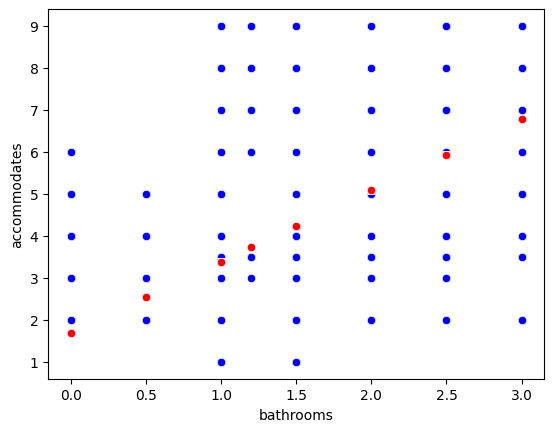

In [ ]:
#Visualizamos la grafica comparativa entre el total real y el total predecido
sns.scatterplot(x='bathrooms', y='accommodates', color="blue", data=Mexico_EH)
sns.scatterplot(x='bathrooms', y='Predicciones_bathrooms_accommodates', color="red", data=Mexico_EH)
#sns.lineplot(x='bathrooms', y='Predicciones_bathrooms_accommodates', color="red", data=Mexico_EH)

In [485]:
#Corroboramos cual es el coeficiente de determinacion de nuestro modelo
coef_Deter = model.score(vars_Indep, var_Dep)
coef_Deter

0.18644204258501607

In [486]:
#Corroboramos cual es el coeficiente de correlacion de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

np.float64(0.4317893497818306)

**| price vs review_scores_cleanliness**

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
vars_Indep = Mexico_EH[['review_scores_cleanliness']] 
var_Dep = Mexico_EH['price']

In [488]:
model = LinearRegression()
type(model)

sklearn.linear_model._base.LinearRegression

In [489]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=vars_Indep, y=var_Dep)

LinearRegression()

In [490]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([49.29586127]),
 'rank_': 1,
 'singular_': array([24.34652488]),
 'intercept_': np.float64(-142.42716852514664)}

Modelo Matematico

In [491]:
#Coeficiente de determinación
model.score(vars_Indep, var_Dep)

0.024160853545163397

In [ ]:
#Predecimos los valores 
y_pred = model.predict(X=Mexico_EH[['review_scores_cleanliness']])
y_pred

array([ 96.65775863,  96.65775863, 100.60142753, ...,  99.12255169,
        99.12255169,  99.12255169], shape=(13001,))

In [ ]:
#Insertamos la columna de predicciones en el dataframe
Mexico_EH.insert(32, 'Predicciones_price_review_scores_cleanliness', y_pred)


<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

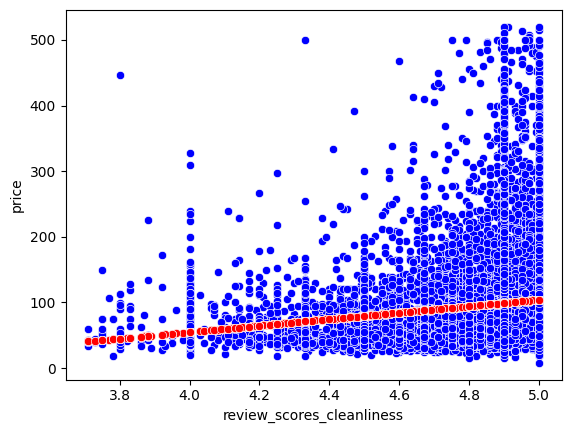

In [ ]:
#Visualizamos la grafica comparativa entre el total real y el total predecido
sns.scatterplot(x='review_scores_cleanliness', y='price', color="blue", data=Mexico_EH)
sns.scatterplot(x='review_scores_cleanliness', y='Predicciones_price_review_scores_cleanliness', color="red", data=Mexico_EH)
#sns.lineplot(x='review_scores_cleanliness', y='Predicciones_price_review_scores_cleanliness', color="red", data=Mexico_EH)

In [495]:
#Corroboramos cual es el coeficiente de determinacion de nuestro modelo
coef_Deter = model.score(vars_Indep, var_Dep)
resultados[("Entire_homeapt","price_review_scores_cleanliness","determinacion")] = coef_Deter
coef_Deter

0.024160853545163397

In [496]:
#Corroboramos cual es el coeficiente de correlacion de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
resultados[("Entire_homeapt","price_review_scores_cleanliness","correlacion")] = coef_Correl
coef_Correl

np.float64(0.15543761946569884)

**| price vs host_identity_verified**

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
vars_Indep = Mexico_EH[['host_identity_verified']] 
var_Dep = Mexico_EH['price']

In [498]:
model = LinearRegression()
type(model)

sklearn.linear_model._base.LinearRegression

In [499]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=vars_Indep, y=var_Dep)

LinearRegression()

In [500]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_identity_verified'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-7.95954367]),
 'rank_': 1,
 'singular_': array([15.59709226]),
 'intercept_': np.float64(103.28629032258087)}

Modelo Matematico

In [501]:
#Coeficiente de determinación
model.score(vars_Indep, var_Dep)

0.0002585121838258875

In [ ]:
#Predecimos los valores 
y_pred = model.predict(X=Mexico_EH[['host_identity_verified']])
y_pred

array([95.32674665, 95.32674665, 95.32674665, ..., 95.32674665,
       95.32674665, 95.32674665], shape=(13001,))

In [ ]:
#Insertamos la columna de predicciones en el dataframe
Mexico_EH.insert(32, 'Predicciones_price_host_identity_verified', y_pred)


<Axes: xlabel='host_identity_verified', ylabel='price'>

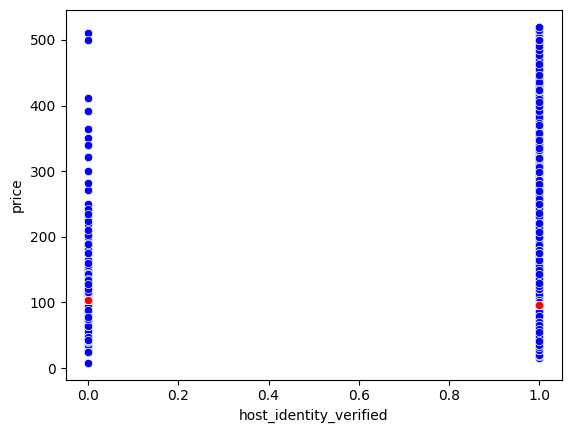

In [ ]:
#Visualizamos la grafica comparativa entre el total real y el total predecido
sns.scatterplot(x='host_identity_verified', y='price', color="blue", data=Mexico_EH)
sns.scatterplot(x='host_identity_verified', y='Predicciones_price_host_identity_verified', color="red", data=Mexico_EH)
#sns.lineplot(x='host_identity_verified', y='Predicciones_price_host_identity_verified', color="red", data=Mexico_EH)

In [505]:
#Corroboramos cual es el coeficiente de determinacion de nuestro modelo
coef_Deter = model.score(vars_Indep, var_Dep)
resultados[("Entire_homeapt","price_host_identity_verified","determinacion")] = coef_Deter
coef_Deter

0.0002585121838258875

In [506]:
#Corroboramos cual es el coeficiente de correlacion de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
resultados[("Entire_homeapt","price_host_identity_verified","correlacion")] = coef_Correl
coef_Correl

np.float64(0.016078314085310297)

**| price vs instant_bookable**

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
vars_Indep = Mexico_EH[['instant_bookable']] 
var_Dep = Mexico_EH['price']

In [508]:
model = LinearRegression()
type(model)

sklearn.linear_model._base.LinearRegression

In [509]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=vars_Indep, y=var_Dep)

LinearRegression()

In [510]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['instant_bookable'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([10.10289798]),
 'rank_': 1,
 'singular_': array([53.86813403]),
 'intercept_': np.float64(88.77310155535224)}

Modelo Matematico

In [511]:
#Coeficiente de determinación
model.score(vars_Indep, var_Dep)

0.004967903978498223

In [ ]:
#Predecimos los valores 
y_pred = model.predict(X=Mexico_EH[['instant_bookable']])
y_pred

array([98.87599954, 98.87599954, 98.87599954, ..., 98.87599954,
       88.77310156, 88.77310156], shape=(13001,))

In [ ]:
#Insertamos la columna de predicciones en el dataframe
Mexico_EH.insert(32, 'Predicciones_price_instant_bookable', y_pred)


<Axes: xlabel='instant_bookable', ylabel='price'>

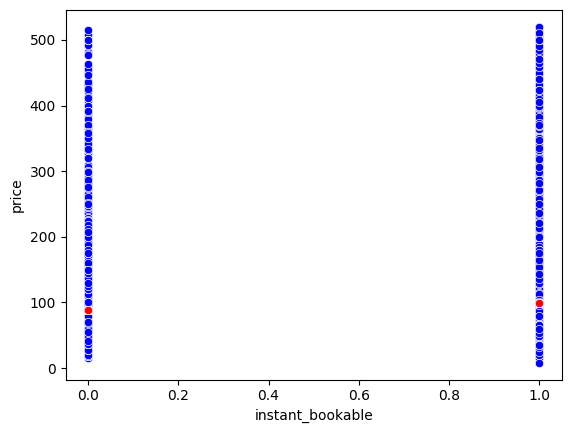

In [ ]:
#Visualizamos la grafica comparativa entre el total real y el total predecido
sns.scatterplot(x='instant_bookable', y='price', color="blue", data=Mexico_EH)
sns.scatterplot(x='instant_bookable', y='Predicciones_price_instant_bookable', color="red", data=Mexico_EH)
#sns.lineplot(x='instant_bookable', y='Predicciones_price_instant_bookable', color="red", data=Mexico_EH)

In [515]:
#Corroboramos cual es el coeficiente de determinacion de nuestro modelo
coef_Deter = model.score(vars_Indep, var_Dep)
resultados[("Entire_homeapt","price_instant_bookable","determinacion")] = coef_Deter
coef_Deter

0.004967903978498223

In [516]:
#Corroboramos cual es el coeficiente de correlacion de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
resultados[("Entire_homeapt","price_instant_bookable","correlacion")] = coef_Correl
coef_Correl

np.float64(0.07048335958577899)

**| price vs property_type**

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
vars_Indep = Mexico_EH[['property_type_encoded']] 
var_Dep = Mexico_EH['price']

In [518]:
model = LinearRegression()
type(model)

sklearn.linear_model._base.LinearRegression

In [519]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=vars_Indep, y=var_Dep)

LinearRegression()

In [520]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['property_type_encoded'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([1.24151087]),
 'rank_': 1,
 'singular_': array([345.23581665]),
 'intercept_': np.float64(83.87296821783477)}

Modelo Matematico

In [521]:
#Coeficiente de determinación
model.score(vars_Indep, var_Dep)

0.003081414597254306

In [ ]:
#Predecimos los valores 
y_pred = model.predict(X=Mexico_EH[['property_type_encoded']])
y_pred

array([88.83901169, 97.52958775, 97.52958775, ..., 97.52958775,
       97.52958775, 97.52958775], shape=(13001,))

In [ ]:
#Insertamos la columna de predicciones en el dataframe
Mexico_EH.insert(32, 'Predicciones_price_property_type', y_pred)


<Axes: xlabel='property_type_encoded', ylabel='price'>

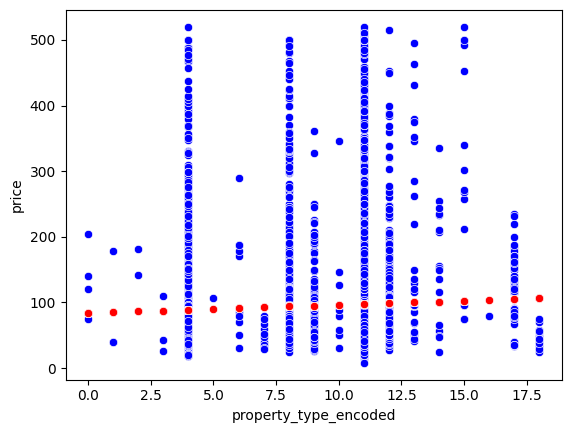

In [ ]:
#Visualizamos la grafica comparativa entre el total real y el total predecido
sns.scatterplot(x='property_type_encoded', y='price', color="blue", data=Mexico_EH)
sns.scatterplot(x='property_type_encoded', y='Predicciones_price_property_type', color="red", data=Mexico_EH)
#sns.lineplot(x='property_type_encoded', y='Predicciones_price_property_type', color="red", data=Mexico_EH)

In [525]:
#Corroboramos cual es el coeficiente de determinacion de nuestro modelo
coef_Deter = model.score(vars_Indep, var_Dep)
resultados[("Entire_homeapt","price_property_type","determinacion")] = coef_Deter
coef_Deter

0.003081414597254306

In [526]:
#Corroboramos cual es el coeficiente de correlacion de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
resultados[("Entire_homeapt","price_property_type","correlacion")] = coef_Correl
coef_Correl

np.float64(0.05551049087563815)

In [ ]:
Mexico_EH.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13001 entries, 0 to 13000
Data columns (total 58 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   last_scraped                                  13001 non-null  object 
 1   source                                        13001 non-null  object 
 2   name                                          13001 non-null  object 
 3   description                                   13001 non-null  object 
 4   neighborhood_overview                         13001 non-null  object 
 5   host_name                                     13001 non-null  object 
 6   host_since                                    13001 non-null  object 
 7   host_location                                 13001 non-null  object 
 8   host_about                                    13001 non-null  object 
 9   host_response_time                            13001 non-null 

# Hotel Room

In [ ]:
#Cargar desde un archivo .csv
Mexico_HR = pd.read_csv('room_type_México/Hotel_room_México.csv')

Mexico_HR.head()

,last_scraped,source,name,description,neighborhood_overview,host_name,host_since,host_location,host_about,host_response_time,...,availability_365,number_of_reviews,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,2024-09-23,previous scrape,Standard Double Room with private shower & Bal...,"My place is close to restaurants and dining, p...",No disponible,Konstantinos,2016-01-10,"Athens, Greece",No disponible,within an hour,...,320,1.0,0.0,4.00,5.00,5.00,5.00,5.00,5.00,0.01
1,2024-09-23,city scrape,Triple Room with private shower & Balcony,"My place is close to restaurants and dining, p...",No disponible,Konstantinos,2016-01-10,"Athens, Greece",No disponible,within an hour,...,328,1.0,0.0,5.00,5.00,5.00,5.00,5.00,5.00,0.03
2,2024-09-23,city scrape,Exceptional Penthouse close to Acropolis by GHH,This exceptional Penthouse close to the Acropo...,A formerly low-profile neighborhood at the foo...,Golden Home Holidays,2015-10-20,"Athens, Greece","Find your own home in Greece, for holidays or ...",within an hour,...,135,84.0,1.0,4.64,4.73,4.73,4.94,4.95,4.69,1.03
3,2024-09-23,city scrape,"Acropolis Grand Residence, Stunning Views","Located in a 1930’s neoclassical building, dir...",The residence is located at 12 Syggrou avenue ...,Vasileios,2017-01-31,"Athens, Greece",We are Bill & John two young entrepreneurs wit...,within an hour,...,292,184.0,1.0,4.98,4.97,4.97,4.98,4.99,4.95,2.33
4,2024-09-23,city scrape,AcropolisView -Two Bedroom Apt by Meros,The apartment is located at the foothills of A...,Thissio is a traditional neighborhood in downt...,Meros,2015-05-06,"Athens, Greece","Hi, we are Meros team and we will be your host...",within an hour,...,74,116.0,5.0,4.77,4.84,4.88,4.79,4.92,4.79,1.48


In [ ]:
Mexico_HR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 50 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   last_scraped                 74 non-null     object 
 1   source                       74 non-null     object 
 2   name                         74 non-null     object 
 3   description                  74 non-null     object 
 4   neighborhood_overview        74 non-null     object 
 5   host_name                    74 non-null     object 
 6   host_since                   74 non-null     object 
 7   host_location                74 non-null     object 
 8   host_about                   74 non-null     object 
 9   host_response_time           74 non-null     object 
 10  host_is_superhost            74 non-null     object 
 11  host_verifications           74 non-null     object 
 12  host_identity_verified       74 non-null     object 
 13  neighbourhood_cleansed

In [ ]:
# Variables binarias: Convertir "yes" -> 1, "no" -> 0
binary_vars = ["host_is_superhost", "host_identity_verified", "instant_bookable"]
for var in binary_vars:
    Mexico_HR[var] = Mexico_HR[var].map({'t': 1, 'f': 0})  # 't' (true) y 'f' (false) en el dataset

In [ ]:
# Convertir "property_type" en variables numéricas label encoding
le = LabelEncoder()
Mexico_HR["property_type_encoded"] = le.fit_transform(Mexico_HR["property_type"])

In [532]:
comparaciones = [
    ("price", "host_acceptance_rate"),
    ("price", "host_is_superhost"),
    ("accommodates", "bathrooms"),
    ("price", "review_scores_cleanliness"),
    ("price", "host_identity_verified"),
    ("price", "instant_bookable")
]

<Axes: xlabel='host_acceptance_rate', ylabel='price'>

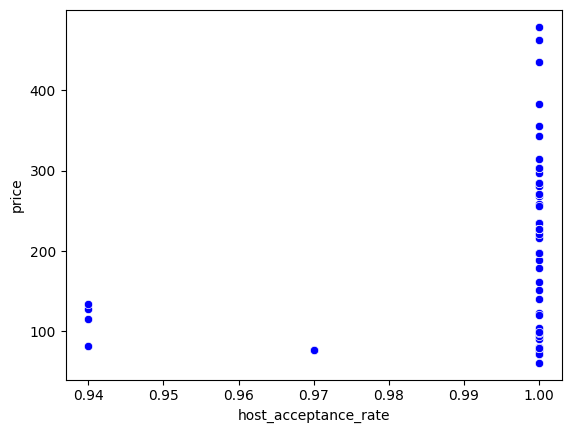

In [ ]:
#Imprimimos el scater plot entre la variable dependiente e independiente 
#para observar el comportamiento en su dispersión

#(price vs host_acceptance_rate)
sns.scatterplot(x='host_acceptance_rate', y='price', color="blue", data=Mexico_HR)


<Axes: xlabel='host_is_superhost', ylabel='price'>

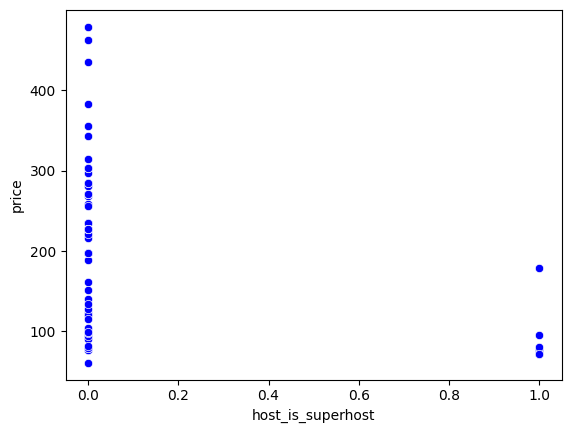

In [ ]:
#(price vs host_is_superhost)
sns.scatterplot(x='host_is_superhost', y='price', color="blue", data=Mexico_HR)

<Axes: xlabel='bathrooms', ylabel='accommodates'>

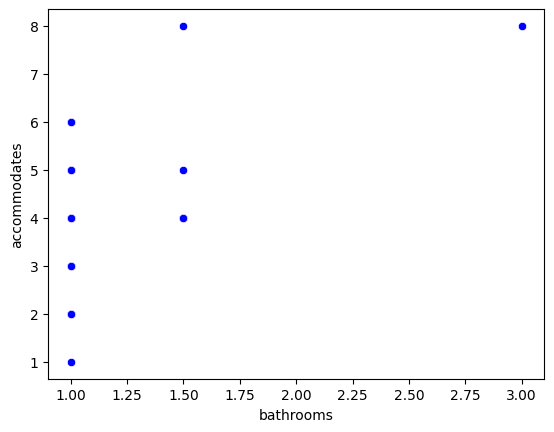

In [ ]:
#(accommodates vs bathrooms)
sns.scatterplot(x='bathrooms', y='accommodates', color="blue", data=Mexico_HR)


<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

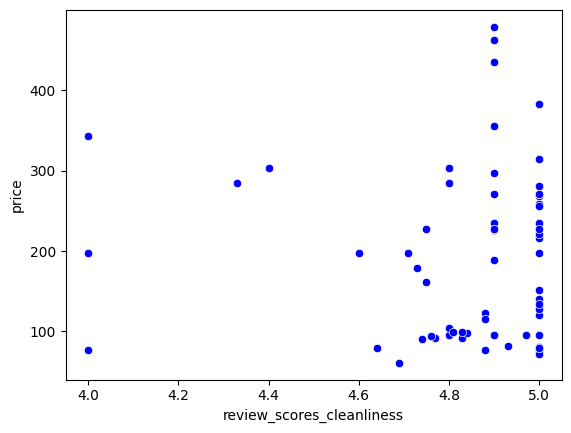

In [ ]:
#(price vs review_scores_cleanliness)
sns.scatterplot(x='review_scores_cleanliness', y='price', color="blue", data=Mexico_HR)

<Axes: xlabel='host_identity_verified', ylabel='price'>

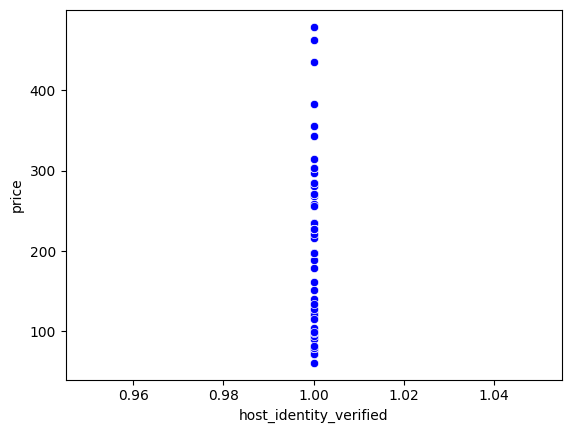

In [ ]:
#(price vs host_identity_verified)
sns.scatterplot(x='host_identity_verified', y='price', color="blue", data=Mexico_HR)

<Axes: xlabel='instant_bookable', ylabel='price'>

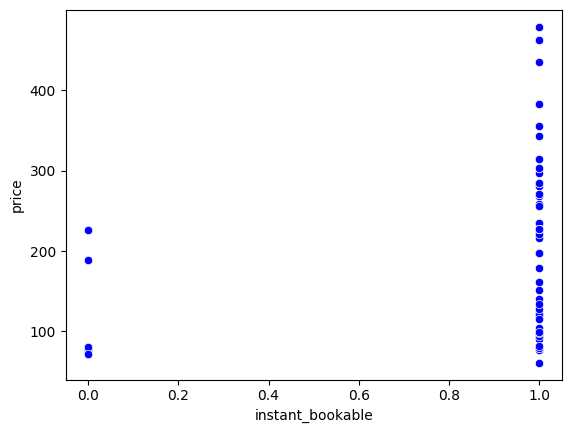

In [ ]:
#(price vs instant_bookable)
sns.scatterplot(x='instant_bookable', y='price', color="blue", data=Mexico_HR)

<Axes: xlabel='property_type_encoded', ylabel='price'>

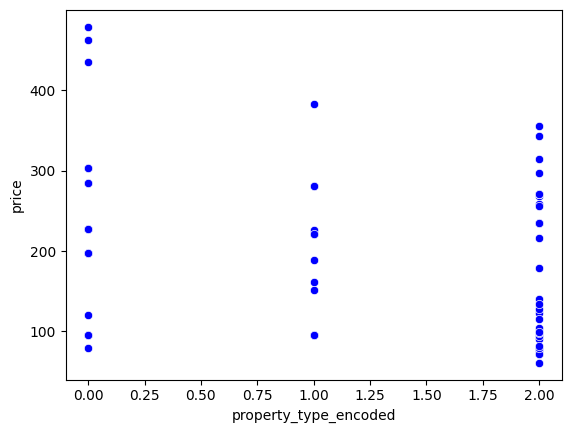

In [ ]:
#(price vs property_type)
sns.scatterplot(x='property_type_encoded', y='price', color="blue", data=Mexico_HR)


**| price vs host_acceptance_rate**

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
vars_Indep = Mexico_HR[['host_acceptance_rate']]
var_Dep = Mexico_HR['price'] 

In [541]:
model = LinearRegression()
type(model)

sklearn.linear_model._base.LinearRegression

In [542]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=vars_Indep, y=var_Dep)

LinearRegression()

In [543]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([1627.27272727]),
 'rank_': 1,
 'singular_': array([0.12240827]),
 'intercept_': np.float64(-1431.9999999999982)}

Modelo Matematico

In [544]:
#Coeficiente de determinación
model.score(vars_Indep, var_Dep)

0.05231821321818653

In [ ]:
#Predecimos los valores 
y_pred = model.predict(X=Mexico_HR[['host_acceptance_rate']])
y_pred

array([195.27272727, 195.27272727, 195.27272727, 195.27272727,
       195.27272727, 195.27272727, 195.27272727, 195.27272727,
       195.27272727, 195.27272727, 195.27272727, 195.27272727,
       195.27272727, 195.27272727, 195.27272727, 195.27272727,
       195.27272727, 195.27272727, 195.27272727, 195.27272727,
       195.27272727, 195.27272727, 195.27272727, 195.27272727,
       195.27272727, 195.27272727, 195.27272727, 195.27272727,
       146.45454545, 146.45454545, 195.27272727, 195.27272727,
       195.27272727, 195.27272727, 195.27272727, 195.27272727,
       195.27272727, 195.27272727, 195.27272727, 195.27272727,
       195.27272727, 195.27272727, 195.27272727, 195.27272727,
       195.27272727, 195.27272727, 195.27272727, 195.27272727,
       195.27272727, 195.27272727, 195.27272727, 195.27272727,
       195.27272727, 195.27272727, 195.27272727, 195.27272727,
       195.27272727, 195.27272727, 195.27272727, 195.27272727,
       195.27272727, 195.27272727, 195.27272727, 195.27

In [ ]:
#Insertamos la columna de predicciones en el dataframe
Mexico_HR.insert(22, 'Predicciones_price_host_acceptance_rate', y_pred)


<Axes: xlabel='host_acceptance_rate', ylabel='price'>

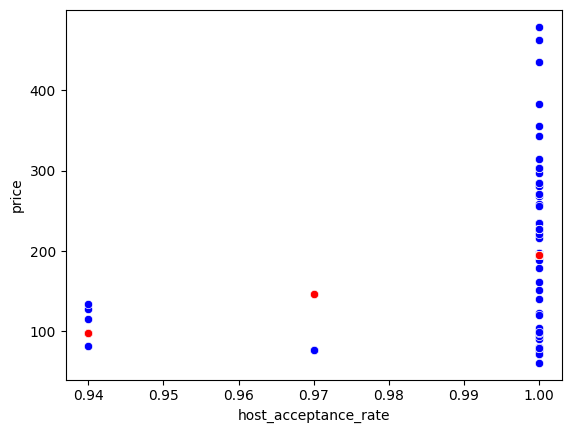

In [ ]:
#Visualizamos la grafica comparativa entre el total real y el total predecido
sns.scatterplot(x='host_acceptance_rate', y='price', color="blue", data=Mexico_HR)
sns.scatterplot(x='host_acceptance_rate', y='Predicciones_price_host_acceptance_rate', color="red", data=Mexico_HR)
#sns.lineplot(x='host_acceptance_rate', y='Predicciones_price_host_acceptance_rate', color="red", data=Mexico_HR)

In [548]:
#Corroboramos cual es el coeficiente de determinacion de nuestro modelo
coef_Deter = model.score(vars_Indep, var_Dep)
resultados[("Hotel_room","price_host_acceptance_rate","determinacion")] = coef_Deter
coef_Deter

0.05231821321818653

In [549]:
#Corroboramos cual es el coeficiente de correlacion de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
resultados[("Hotel_room","price_host_acceptance_rate","correlacion")] = coef_Correl
coef_Correl

np.float64(0.2287317494756391)

**| price vs host_is_superhost**

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
vars_Indep = Mexico_HR[['host_is_superhost']]
var_Dep = Mexico_HR['price'] 

In [551]:
model = LinearRegression()
type(model)

sklearn.linear_model._base.LinearRegression

In [552]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=vars_Indep, y=var_Dep)

LinearRegression()

In [553]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_is_superhost'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-105.35607676]),
 'rank_': 1,
 'singular_': array([2.51750627]),
 'intercept_': np.float64(198.6417910447761)}

Modelo Matematico

In [554]:
#Coeficiente de determinación
model.score(vars_Indep, var_Dep)

0.09276219514523298

In [ ]:
#Predecimos los valores 
y_pred = model.predict(X=Mexico_HR[['host_is_superhost']])
y_pred

array([198.64179104, 198.64179104,  93.28571429,  93.28571429,
       198.64179104, 198.64179104, 198.64179104, 198.64179104,
       198.64179104, 198.64179104, 198.64179104, 198.64179104,
       198.64179104, 198.64179104, 198.64179104, 198.64179104,
       198.64179104, 198.64179104, 198.64179104, 198.64179104,
       198.64179104, 198.64179104, 198.64179104, 198.64179104,
       198.64179104, 198.64179104, 198.64179104, 198.64179104,
       198.64179104, 198.64179104,  93.28571429,  93.28571429,
        93.28571429,  93.28571429,  93.28571429, 198.64179104,
       198.64179104, 198.64179104, 198.64179104, 198.64179104,
       198.64179104, 198.64179104, 198.64179104, 198.64179104,
       198.64179104, 198.64179104, 198.64179104, 198.64179104,
       198.64179104, 198.64179104, 198.64179104, 198.64179104,
       198.64179104, 198.64179104, 198.64179104, 198.64179104,
       198.64179104, 198.64179104, 198.64179104, 198.64179104,
       198.64179104, 198.64179104, 198.64179104, 198.64

In [ ]:
#Insertamos la columna de predicciones en el dataframe
Mexico_HR.insert(10, 'Predicciones_price_host_is_superhost', y_pred)


<Axes: xlabel='host_is_superhost', ylabel='price'>

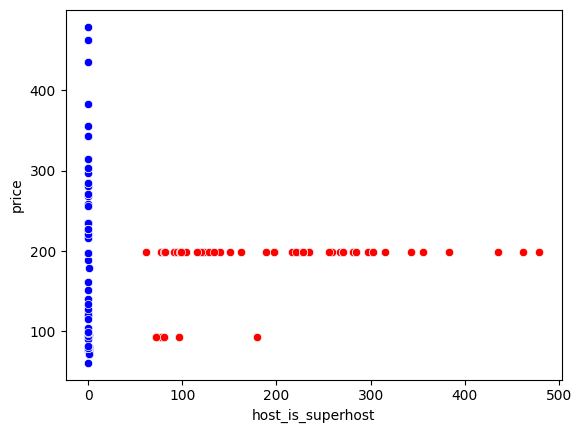

In [ ]:
#Visualizamos la grafica comparativa entre el total real y el total predecido
sns.scatterplot(x='host_is_superhost', y='price', color="blue", data=Mexico_HR)
sns.scatterplot(x='price', y='Predicciones_price_host_is_superhost', color="red", data=Mexico_HR)
#sns.lineplot(x='price', y='Predicciones_price_host_is_superhost', color="red", data=Mexico_HR)

In [558]:
#Corroboramos cual es el coeficiente de determinacion de nuestro modelo
coef_Deter = model.score(vars_Indep, var_Dep)
resultados[("Hotel_room","price_host_is_superhost","determinacion")] = coef_Deter
coef_Deter

0.09276219514523298

In [559]:
#Corroboramos cual es el coeficiente de correlacion de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
resultados[("Hotel_room","price_host_is_superhost","correlacion")] = coef_Correl
coef_Correl

np.float64(0.30456886765595886)

**| accommodates vs bathrooms**

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
vars_Indep = Mexico_HR[['bathrooms']] 
var_Dep = Mexico_HR['accommodates']

In [561]:
model = LinearRegression()
type(model)

sklearn.linear_model._base.LinearRegression

In [562]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=vars_Indep, y=var_Dep)

LinearRegression()

In [563]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['bathrooms'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([2.74509804]),
 'rank_': 1,
 'singular_': array([2.31110714]),
 'intercept_': np.float64(0.29411764705882426)}

Modelo Matematico

In [564]:
#Coeficiente de determinación
model.score(vars_Indep, var_Dep)

0.3012167650231615

In [ ]:
#Predecimos los valores 
y_pred = model.predict(X=Mexico_HR[['bathrooms']])
y_pred

array([3.03921569, 3.03921569, 4.41176471, 8.52941176, 3.03921569,
       3.03921569, 3.03921569, 3.03921569, 3.03921569, 3.03921569,
       3.03921569, 3.03921569, 3.03921569, 3.03921569, 4.41176471,
       4.41176471, 3.03921569, 3.03921569, 3.03921569, 3.03921569,
       3.03921569, 4.41176471, 4.41176471, 3.03921569, 3.03921569,
       4.41176471, 4.41176471, 3.03921569, 3.03921569, 3.03921569,
       3.03921569, 3.03921569, 3.03921569, 3.03921569, 3.03921569,
       3.03921569, 3.03921569, 3.03921569, 3.03921569, 3.03921569,
       3.03921569, 3.03921569, 3.03921569, 3.03921569, 3.03921569,
       3.03921569, 3.03921569, 3.03921569, 3.03921569, 3.03921569,
       3.03921569, 3.03921569, 3.03921569, 3.03921569, 3.03921569,
       3.03921569, 3.03921569, 3.03921569, 3.03921569, 3.03921569,
       3.03921569, 3.03921569, 3.03921569, 3.03921569, 3.03921569,
       3.03921569, 3.03921569, 3.03921569, 3.03921569, 3.03921569,
       3.03921569, 3.03921569, 3.03921569, 3.03921569])

In [ ]:
#Insertamos la columna de predicciones en el dataframe
Mexico_HR.insert(29, 'Predicciones_bathrooms_accommodates', y_pred)


<Axes: xlabel='bathrooms', ylabel='accommodates'>

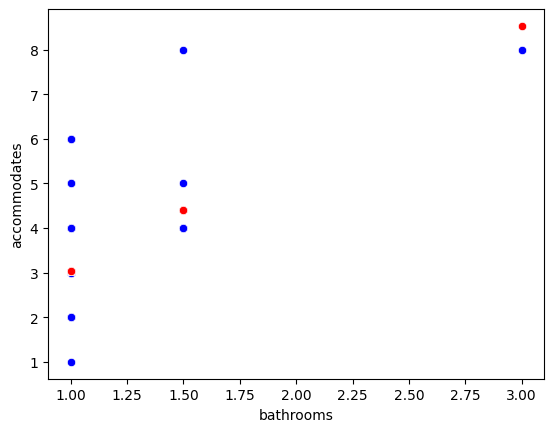

In [ ]:
#Visualizamos la grafica comparativa entre el total real y el total predecido
sns.scatterplot(x='bathrooms', y='accommodates', color="blue", data=Mexico_HR)
sns.scatterplot(x='bathrooms', y='Predicciones_bathrooms_accommodates', color="red", data=Mexico_HR)
#sns.lineplot(x='bathrooms', y='Predicciones_bathrooms_accommodates', color="red", data=Mexico_HR)

In [568]:
#Corroboramos cual es el coeficiente de determinacion de nuestro modelo
coef_Deter = model.score(vars_Indep, var_Dep)
resultados[("Hotel_room","bathrooms_accommodates","determinacion")] = coef_Deter
coef_Deter

0.3012167650231615

In [569]:
#Corroboramos cual es el coeficiente de correlacion de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
resultados[("Hotel_room","bathrooms_accommodates","correlacion")] = coef_Correl
coef_Correl

np.float64(0.5488321829331454)

**| price vs review_scores_cleanliness**

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
vars_Indep = Mexico_HR[['review_scores_cleanliness']] 
var_Dep = Mexico_HR['price']

In [571]:
model = LinearRegression()
type(model)

sklearn.linear_model._base.LinearRegression

In [572]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=vars_Indep, y=var_Dep)

LinearRegression()

In [573]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-14.19512004]),
 'rank_': 1,
 'singular_': array([1.89185452]),
 'intercept_': np.float64(257.5066617734114)}

Modelo Matematico

In [574]:
#Coeficiente de determinación
model.score(vars_Indep, var_Dep)

0.000950964545163524

In [ ]:
#Predecimos los valores 
y_pred = model.predict(X=Mexico_HR[['review_scores_cleanliness']])
y_pred

array([186.53106159, 186.53106159, 190.363744  , 186.9569152 ,
       188.234476  , 187.9505736 , 187.9505736 , 187.9505736 ,
       186.53106159, 187.9505736 , 187.9505736 , 187.9505736 ,
       187.9505736 , 186.53106159, 200.72618163, 187.9505736 ,
       186.53106159, 186.53106159, 186.53106159, 187.9505736 ,
       186.53106159, 187.9505736 , 186.53106159, 186.53106159,
       186.53106159, 186.53106159, 187.9505736 , 187.9505736 ,
       188.234476  , 200.72618163, 186.53106159, 186.53106159,
       186.53106159, 186.53106159, 186.53106159, 188.944232  ,
       189.7959392 , 190.2217928 , 189.3700856 , 189.9378904 ,
       188.8022808 , 188.944232  , 189.3700856 , 189.2281344 ,
       186.53106159, 186.53106159, 186.53106159, 191.64130481,
       190.93154881, 187.9505736 , 187.9505736 , 186.53106159,
       186.53106159, 190.0798416 , 186.53106159, 186.53106159,
       186.53106159, 190.0798416 , 190.0798416 , 200.72618163,
       189.3700856 , 189.3700856 , 196.04179202, 190.64

In [ ]:
#Insertamos la columna de predicciones en el dataframe
Mexico_HR.insert(32, 'Predicciones_price_review_scores_cleanliness', y_pred)


<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

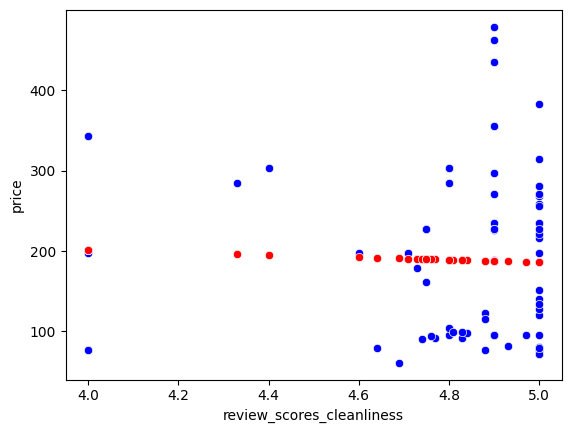

In [ ]:
#Visualizamos la grafica comparativa entre el total real y el total predecido
sns.scatterplot(x='review_scores_cleanliness', y='price', color="blue", data=Mexico_HR)
sns.scatterplot(x='review_scores_cleanliness', y='Predicciones_price_review_scores_cleanliness', color="red", data=Mexico_HR)
#sns.lineplot(x='review_scores_cleanliness', y='Predicciones_price_review_scores_cleanliness', color="red", data=Mexico_HR)

In [578]:
#Corroboramos cual es el coeficiente de determinacion de nuestro modelo
coef_Deter = model.score(vars_Indep, var_Dep)
resultados[("Hotel_room","price_review_scores_cleanliness","determinacion")] = coef_Deter
coef_Deter

0.000950964545163524

In [579]:
#Corroboramos cual es el coeficiente de correlacion de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
resultados[("Hotel_room","price_review_scores_cleanliness","correlacion")] = coef_Correl
coef_Correl

np.float64(0.030837713033938233)

**| price vs host_identity_verified**

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
vars_Indep = Mexico_HR[['host_identity_verified']] 
var_Dep = Mexico_HR['price']

In [581]:
model = LinearRegression()
type(model)

sklearn.linear_model._base.LinearRegression

In [582]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=vars_Indep, y=var_Dep)

LinearRegression()

In [583]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_identity_verified'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.]),
 'rank_': 0,
 'singular_': array([0.]),
 'intercept_': np.float64(188.67567567567568)}

Modelo Matematico

In [584]:
#Coeficiente de determinación
model.score(vars_Indep, var_Dep)

0.0

In [ ]:
#Predecimos los valores 
y_pred = model.predict(X=Mexico_HR[['host_identity_verified']])
y_pred

array([188.67567568, 188.67567568, 188.67567568, 188.67567568,
       188.67567568, 188.67567568, 188.67567568, 188.67567568,
       188.67567568, 188.67567568, 188.67567568, 188.67567568,
       188.67567568, 188.67567568, 188.67567568, 188.67567568,
       188.67567568, 188.67567568, 188.67567568, 188.67567568,
       188.67567568, 188.67567568, 188.67567568, 188.67567568,
       188.67567568, 188.67567568, 188.67567568, 188.67567568,
       188.67567568, 188.67567568, 188.67567568, 188.67567568,
       188.67567568, 188.67567568, 188.67567568, 188.67567568,
       188.67567568, 188.67567568, 188.67567568, 188.67567568,
       188.67567568, 188.67567568, 188.67567568, 188.67567568,
       188.67567568, 188.67567568, 188.67567568, 188.67567568,
       188.67567568, 188.67567568, 188.67567568, 188.67567568,
       188.67567568, 188.67567568, 188.67567568, 188.67567568,
       188.67567568, 188.67567568, 188.67567568, 188.67567568,
       188.67567568, 188.67567568, 188.67567568, 188.67

In [ ]:
#Insertamos la columna de predicciones en el dataframe
Mexico_HR.insert(32, 'Predicciones_price_host_identity_verified', y_pred)


<Axes: xlabel='host_identity_verified', ylabel='price'>

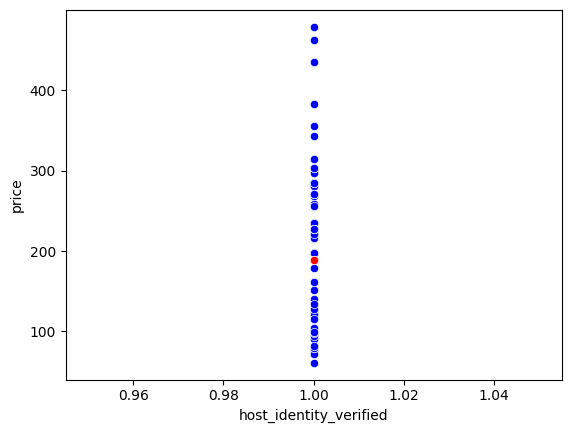

In [ ]:
#Visualizamos la grafica comparativa entre el total real y el total predecido
sns.scatterplot(x='host_identity_verified', y='price', color="blue", data=Mexico_HR)
sns.scatterplot(x='host_identity_verified', y='Predicciones_price_host_identity_verified', color="red", data=Mexico_HR)
#sns.lineplot(x='host_identity_verified', y='Predicciones_price_host_identity_verified', color="red", data=Mexico_HR)

In [588]:
#Corroboramos cual es el coeficiente de determinacion de nuestro modelo
coef_Deter = model.score(vars_Indep, var_Dep)
resultados[("Hotel_room","price_host_identity_verified","determinacion")] = coef_Deter
coef_Deter

0.0

In [589]:
#Corroboramos cual es el coeficiente de correlacion de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
resultados[("Hotel_room","price_host_identity_verified","correlacion")] = coef_Correl
coef_Correl

np.float64(0.0)

**| price vs instant_bookable**

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
vars_Indep = Mexico_HR[['instant_bookable']] 
var_Dep = Mexico_HR['price']

In [591]:
model = LinearRegression()
type(model)

sklearn.linear_model._base.LinearRegression

In [592]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=vars_Indep, y=var_Dep)

LinearRegression()

In [593]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['instant_bookable'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([83.26652452]),
 'rank_': 1,
 'singular_': array([2.51750627]),
 'intercept_': np.float64(113.28571428571428)}

Modelo Matematico

In [594]:
#Coeficiente de determinación
model.score(vars_Indep, var_Dep)

0.057941897445925594

In [ ]:
#Predecimos los valores 
y_pred = model.predict(X=Mexico_HR[['instant_bookable']])
y_pred

array([196.55223881, 196.55223881, 196.55223881, 196.55223881,
       196.55223881, 196.55223881, 196.55223881, 196.55223881,
       196.55223881, 196.55223881, 196.55223881, 196.55223881,
       196.55223881, 196.55223881, 196.55223881, 196.55223881,
       196.55223881, 196.55223881, 196.55223881, 196.55223881,
       196.55223881, 196.55223881, 196.55223881, 196.55223881,
       196.55223881, 196.55223881, 196.55223881, 196.55223881,
       196.55223881, 196.55223881, 113.28571429, 113.28571429,
       113.28571429, 113.28571429, 113.28571429, 196.55223881,
       196.55223881, 196.55223881, 196.55223881, 196.55223881,
       196.55223881, 196.55223881, 196.55223881, 196.55223881,
       196.55223881, 196.55223881, 196.55223881, 196.55223881,
       196.55223881, 113.28571429, 113.28571429, 196.55223881,
       196.55223881, 196.55223881, 196.55223881, 196.55223881,
       196.55223881, 196.55223881, 196.55223881, 196.55223881,
       196.55223881, 196.55223881, 196.55223881, 196.55

In [ ]:
#Insertamos la columna de predicciones en el dataframe
Mexico_HR.insert(32, 'Predicciones_price_instant_bookable', y_pred)


<Axes: xlabel='instant_bookable', ylabel='price'>

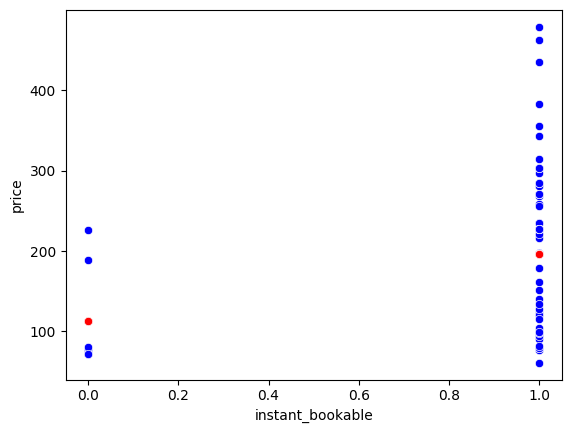

In [ ]:
#Visualizamos la grafica comparativa entre el total real y el total predecido
sns.scatterplot(x='instant_bookable', y='price', color="blue", data=Mexico_HR)
sns.scatterplot(x='instant_bookable', y='Predicciones_price_instant_bookable', color="red", data=Mexico_HR)
#sns.lineplot(x='instant_bookable', y='Predicciones_price_instant_bookable', color="red", data=Mexico_HR)

In [598]:
#Corroboramos cual es el coeficiente de determinacion de nuestro modelo
coef_Deter = model.score(vars_Indep, var_Dep)
resultados[("Hotel_room","price_instant_bookable","determinacion")] = coef_Deter
coef_Deter

0.057941897445925594

In [599]:
#Corroboramos cual es el coeficiente de correlacion de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
resultados[("Hotel_room","price_instant_bookable","correlacion")] = coef_Correl
coef_Correl

np.float64(0.2407112324880698)

**| price vs property_type**

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
vars_Indep = Mexico_HR[['property_type_encoded']] 
var_Dep = Mexico_HR['price']

In [601]:
model = LinearRegression()
type(model)

sklearn.linear_model._base.LinearRegression

In [602]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=vars_Indep, y=var_Dep)

LinearRegression()

In [603]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['property_type_encoded'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-37.38508876]),
 'rank_': 1,
 'singular_': array([7.55609652]),
 'intercept_': np.float64(234.64923076923077)}

Modelo Matematico

In [604]:
#Coeficiente de determinación
model.score(vars_Indep, var_Dep)

0.10522102786750265

In [ ]:
#Predecimos los valores 
y_pred = model.predict(X=Mexico_HR[['property_type_encoded']])
y_pred

array([197.26414201, 197.26414201, 159.87905325, 197.26414201,
       159.87905325, 197.26414201, 197.26414201, 197.26414201,
       234.64923077, 234.64923077, 234.64923077, 234.64923077,
       234.64923077, 159.87905325, 159.87905325, 159.87905325,
       159.87905325, 159.87905325, 159.87905325, 159.87905325,
       159.87905325, 159.87905325, 159.87905325, 159.87905325,
       159.87905325, 159.87905325, 159.87905325, 234.64923077,
       159.87905325, 159.87905325, 159.87905325, 159.87905325,
       159.87905325, 159.87905325, 159.87905325, 159.87905325,
       159.87905325, 159.87905325, 159.87905325, 159.87905325,
       159.87905325, 159.87905325, 159.87905325, 159.87905325,
       234.64923077, 159.87905325, 234.64923077, 159.87905325,
       159.87905325, 197.26414201, 197.26414201, 197.26414201,
       197.26414201, 197.26414201, 197.26414201, 197.26414201,
       234.64923077, 234.64923077, 234.64923077, 234.64923077,
       234.64923077, 234.64923077, 234.64923077, 234.64

In [ ]:
#Insertamos la columna de predicciones en el dataframe
Mexico_HR.insert(32, 'Predicciones_price_property_type', y_pred)


<Axes: xlabel='property_type_encoded', ylabel='price'>

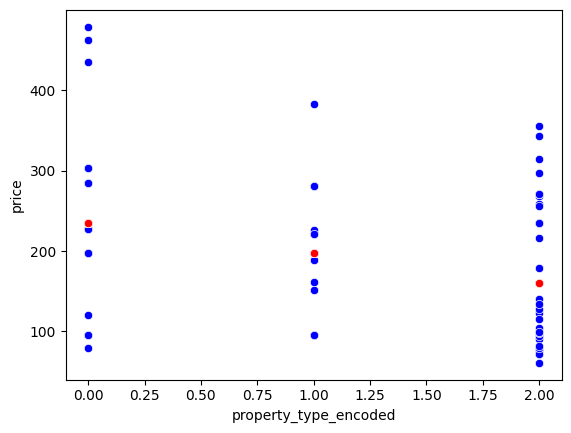

In [ ]:
#Visualizamos la grafica comparativa entre el total real y el total predecido
sns.scatterplot(x='property_type_encoded', y='price', color="blue", data=Mexico_HR)
sns.scatterplot(x='property_type_encoded', y='Predicciones_price_property_type', color="red", data=Mexico_HR)
#sns.lineplot(x='property_type_encoded', y='Predicciones_price_property_type', color="red", data=Mexico_HR)

In [608]:
#Corroboramos cual es el coeficiente de determinacion de nuestro modelo
coef_Deter = model.score(vars_Indep, var_Dep)
resultados[("Hotel_room","price_property_type","determinacion")] = coef_Deter
coef_Deter

0.10522102786750265

In [609]:
#Corroboramos cual es el coeficiente de correlacion de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
resultados[("Hotel_room","price_property_type","correlacion")] = coef_Correl
coef_Correl

np.float64(0.32437790903127584)

In [ ]:
Mexico_HR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 58 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   last_scraped                                  74 non-null     object 
 1   source                                        74 non-null     object 
 2   name                                          74 non-null     object 
 3   description                                   74 non-null     object 
 4   neighborhood_overview                         74 non-null     object 
 5   host_name                                     74 non-null     object 
 6   host_since                                    74 non-null     object 
 7   host_location                                 74 non-null     object 
 8   host_about                                    74 non-null     object 
 9   host_response_time                            74 non-null     objec

# Private Room

In [ ]:
#Cargar desde un archivo .csv
Mexico_PR = pd.read_csv('room_type_México/Private_room_México.csv')

Mexico_PR.head()

,last_scraped,source,name,description,neighborhood_overview,host_name,host_since,host_location,host_about,host_response_time,...,availability_365,number_of_reviews,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,2024-09-23,city scrape,Lovely room in historic center,"relaxed, quiet area, next to all historic and ...",No disponible,Haris,2012-06-03,"Athens, Greece",Welcome in my profile on Airbnb! Infos about o...,within an hour,...,83,4.0,0.0,4.75,4.75,4.50,4.50,4.75,4.50,0.03
1,2024-09-23,city scrape,Room and private bathroom in Athens,Comfortable and quiet private bedroom with a k...,In my safe and easily accessible neighborhood ...,Nick,2014-04-06,"Athens, Greece","Hey , I'm Nick!",within an hour,...,29,42.9,5.0,4.92,4.97,4.91,4.96,4.87,4.93,3.09
2,2024-09-23,city scrape,Room with Balcony in Filopapos Hill,No disponible,No disponible,Sofia,2013-06-19,"Athens, Greece",I like traveling all over the world. It makes ...,a few days or more,...,362,15.0,0.0,4.73,4.87,5.00,5.00,4.73,4.80,0.11
3,2024-09-23,city scrape,Room with privet bathroom in Athens,Comfortable and quiet private bedroom with a p...,In my safe and easily accessible neighborhood ...,Nick,2014-04-06,"Athens, Greece","Hey , I'm Nick!",within an hour,...,52,42.9,3.0,4.93,4.95,4.96,4.95,4.87,4.94,3.08
4,2024-09-23,city scrape,Acropolis view-150 metres from Metro Monastiraki!,"My house is located in Monastiraki area, righ...",My neighborhood is the most charming area in A...,Makis,2014-05-06,"Athens, Greece",I am an actor and director. I like writing and...,within an hour,...,0,189.0,0.0,4.59,4.74,4.54,4.79,4.90,4.61,1.50


In [ ]:
Mexico_PR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 50 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   last_scraped                 1007 non-null   object 
 1   source                       1007 non-null   object 
 2   name                         1007 non-null   object 
 3   description                  1007 non-null   object 
 4   neighborhood_overview        1007 non-null   object 
 5   host_name                    1007 non-null   object 
 6   host_since                   1007 non-null   object 
 7   host_location                1007 non-null   object 
 8   host_about                   1007 non-null   object 
 9   host_response_time           1007 non-null   object 
 10  host_is_superhost            1007 non-null   object 
 11  host_verifications           1007 non-null   object 
 12  host_identity_verified       1007 non-null   object 
 13  neighbourhood_clea

In [ ]:
# Variables binarias: Convertir "yes" -> 1, "no" -> 0
binary_vars = ["host_is_superhost", "host_identity_verified", "instant_bookable"]
for var in binary_vars:
    Mexico_PR[var] = Mexico_PR[var].map({'t': 1, 'f': 0})  # 't' (true) y 'f' (false) en el dataset

In [ ]:
# Convertir "property_type" en variables numéricas label encoding
le = LabelEncoder()
Mexico_PR["property_type_encoded"] = le.fit_transform(Mexico_PR["property_type"])

In [615]:
comparaciones = [
    ("price", "host_acceptance_rate"),
    ("price", "host_is_superhost"),
    ("accommodates", "bathrooms"),
    ("price", "review_scores_cleanliness"),
    ("price", "host_identity_verified"),
    ("price", "instant_bookable")
]

<Axes: xlabel='host_acceptance_rate', ylabel='price'>

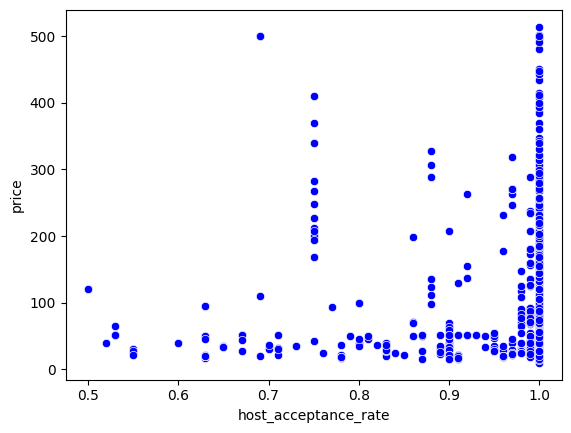

In [ ]:
#Imprimimos el scater plot entre la variable dependiente e independiente 
#para observar el comportamiento en su dispersión

#(price vs host_acceptance_rate)
sns.scatterplot(x='host_acceptance_rate', y='price', color="blue", data=Mexico_PR)


<Axes: xlabel='host_is_superhost', ylabel='price'>

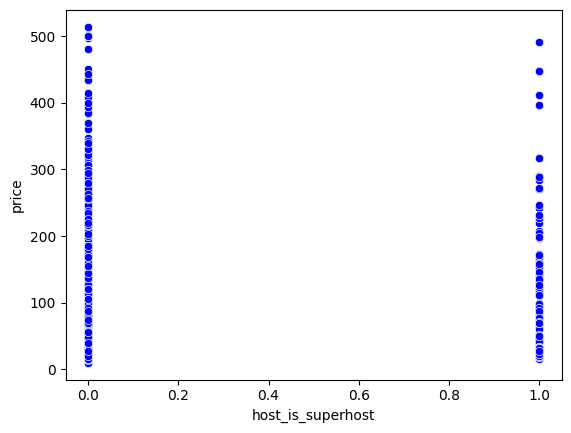

In [ ]:
#(price vs host_is_superhost)
sns.scatterplot(x='host_is_superhost', y='price', color="blue", data=Mexico_PR)

<Axes: xlabel='bathrooms', ylabel='accommodates'>

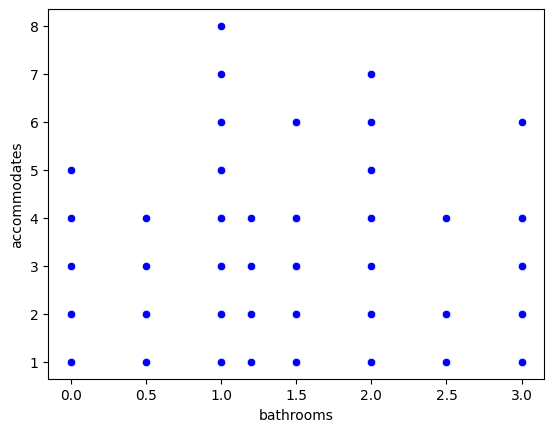

In [ ]:
#(accommodates vs bathrooms)
sns.scatterplot(x='bathrooms', y='accommodates', color="blue", data=Mexico_PR)


<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

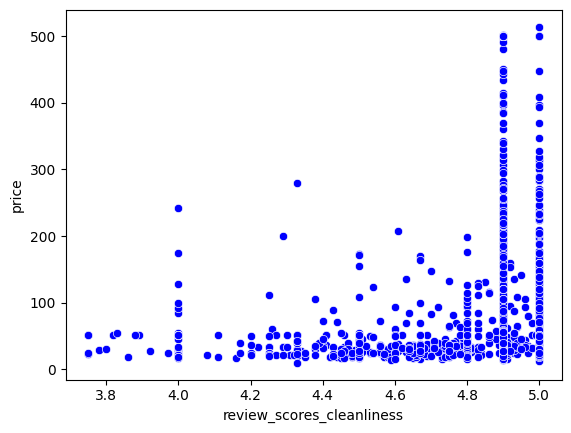

In [ ]:
#(price vs review_scores_cleanliness)
sns.scatterplot(x='review_scores_cleanliness', y='price', color="blue", data=Mexico_PR)

<Axes: xlabel='host_identity_verified', ylabel='price'>

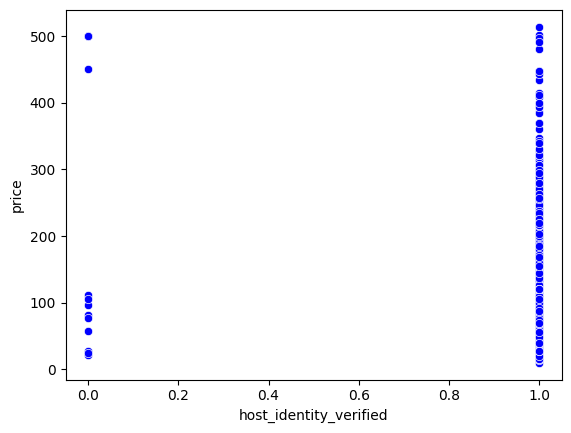

In [ ]:
#(price vs host_identity_verified)
sns.scatterplot(x='host_identity_verified', y='price', color="blue", data=Mexico_PR)

<Axes: xlabel='instant_bookable', ylabel='price'>

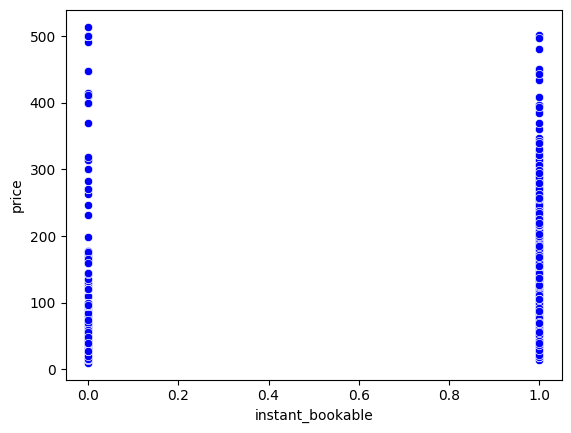

In [ ]:
#(price vs instant_bookable)
sns.scatterplot(x='instant_bookable', y='price', color="blue", data=Mexico_PR)

<Axes: xlabel='property_type_encoded', ylabel='price'>

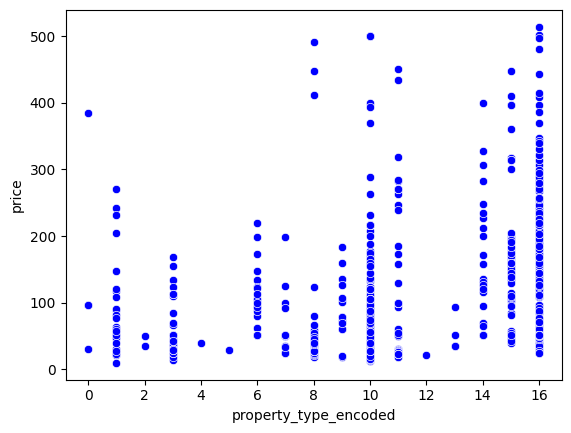

In [ ]:
#(price vs property_type)
sns.scatterplot(x='property_type_encoded', y='price', color="blue", data=Mexico_PR)


**| price vs host_acceptance_rate**

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
vars_Indep = Mexico_PR[['host_acceptance_rate']] 
var_Dep = Mexico_PR['price']

In [624]:
model = LinearRegression()
type(model)

sklearn.linear_model._base.LinearRegression

In [625]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=vars_Indep, y=var_Dep)

LinearRegression()

In [626]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([16.50554081]),
 'rank_': 1,
 'singular_': array([3.24466835]),
 'intercept_': np.float64(84.35557519143528)}

Modelo Matematico

In [627]:
#Coeficiente de determinación
model.score(vars_Indep, var_Dep)

0.00026212570083639086

In [ ]:
#Predecimos los valores 
y_pred = model.predict(X=Mexico_PR[['host_acceptance_rate']])
y_pred

array([ 99.87078356, 100.861116  , 100.861116  , ..., 100.861116  ,
       100.6960606 , 100.861116  ], shape=(1007,))

In [ ]:
#Insertamos la columna de predicciones en el dataframe
Mexico_PR.insert(22, 'Predicciones_price_host_acceptance_rate', y_pred)


<Axes: xlabel='host_acceptance_rate', ylabel='price'>

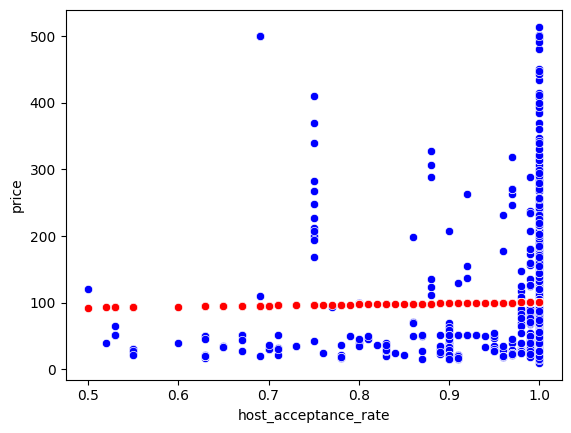

In [ ]:
#Visualizamos la grafica comparativa entre el total real y el total predecido
sns.scatterplot(x='host_acceptance_rate', y='price', color="blue", data=Mexico_PR)
sns.scatterplot(x='host_acceptance_rate', y='Predicciones_price_host_acceptance_rate', color="red", data=Mexico_PR)
#sns.lineplot(x='host_acceptance_rate', y='Predicciones_price_host_acceptance_rate', color="red", data=Mexico_PR)

In [631]:
#Corroboramos cual es el coeficiente de determinacion de nuestro modelo
coef_Deter = model.score(vars_Indep, var_Dep)
resultados[("Private_room","price_host_acceptance_rate","determinacion")] = coef_Deter
coef_Deter

0.00026212570083639086

In [632]:
#Corroboramos cual es el coeficiente de correlacion de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
resultados[("Private_room","price_host_acceptance_rate","correlacion")] = coef_Correl
coef_Correl

np.float64(0.01619029650242363)

**| price vs host_is_superhost**

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
vars_Indep = Mexico_PR[['host_is_superhost']] 
var_Dep = Mexico_PR['price']

In [634]:
model = LinearRegression()
type(model)

sklearn.linear_model._base.LinearRegression

In [635]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=vars_Indep, y=var_Dep)

LinearRegression()

In [636]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_is_superhost'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-5.28153518]),
 'rank_': 1,
 'singular_': array([11.7743599]),
 'intercept_': np.float64(100.84780023781212)}

Modelo Matematico

In [637]:
#Coeficiente de determinación
model.score(vars_Indep, var_Dep)

0.00035343082890959554

In [ ]:
#Predecimos los valores 
y_pred = model.predict(X=Mexico_PR[['host_is_superhost']])
y_pred

array([ 95.56626506,  95.56626506, 100.84780024, ..., 100.84780024,
       100.84780024, 100.84780024], shape=(1007,))

In [ ]:
#Insertamos la columna de predicciones en el dataframe
Mexico_PR.insert(10, 'Predicciones_price_host_is_superhost', y_pred)


<Axes: xlabel='host_is_superhost', ylabel='price'>

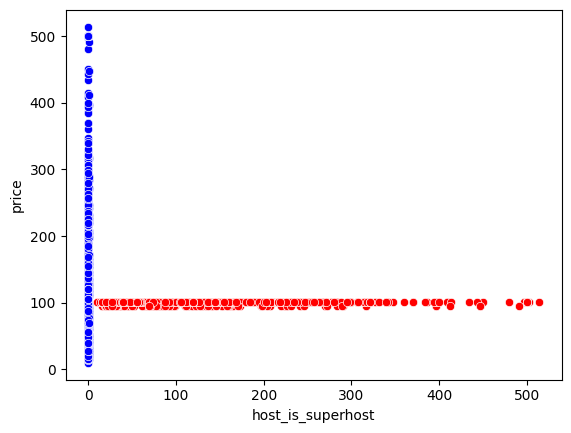

In [ ]:
#Visualizamos la grafica comparativa entre el total real y el total predecido
sns.scatterplot(x='host_is_superhost', y='price', color="blue", data=Mexico_PR)
sns.scatterplot(x='price', y='Predicciones_price_host_is_superhost', color="red", data=Mexico_PR)
#sns.lineplot(x='price', y='Predicciones_price_host_is_superhost', color="red", data=Mexico_PR)

In [641]:
#Corroboramos cual es el coeficiente de determinacion de nuestro modelo
coef_Deter = model.score(vars_Indep, var_Dep)
resultados[("Private_room","price_host_is_superhost","determinacion")] = coef_Deter
coef_Deter

0.00035343082890959554

In [642]:
#Corroboramos cual es el coeficiente de correlacion de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
resultados[("Private_room","price_host_is_superhost","correlacion")] = coef_Correl
coef_Correl

np.float64(0.018799756086438874)

**| accommodates vs bathrooms**

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
vars_Indep = Mexico_PR[['bathrooms']] 
var_Dep = Mexico_PR['accommodates']

In [644]:
model = LinearRegression()
type(model)

sklearn.linear_model._base.LinearRegression

In [645]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=vars_Indep, y=var_Dep)

LinearRegression()

In [646]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['bathrooms'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.04255734]),
 'rank_': 1,
 'singular_': array([14.91769209]),
 'intercept_': np.float64(2.1469240988097473)}

Modelo Matematico

In [647]:
#Coeficiente de determinación
model.score(vars_Indep, var_Dep)

0.0004385350881864758

In [ ]:
#Predecimos los valores 
y_pred = model.predict(X=Mexico_PR[['bathrooms']])
y_pred

array([2.18948144, 2.18948144, 2.18948144, ..., 2.18948144, 2.23203878,
       2.18948144], shape=(1007,))

In [ ]:
#Insertamos la columna de predicciones en el dataframe
Mexico_PR.insert(29, 'Predicciones_bathrooms_accommodates', y_pred)


<Axes: xlabel='bathrooms', ylabel='accommodates'>

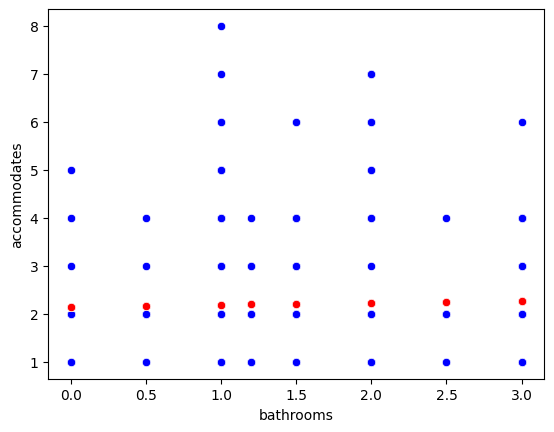

In [ ]:
#Visualizamos la grafica comparativa entre el total real y el total predecido
sns.scatterplot(x='bathrooms', y='accommodates', color="blue", data=Mexico_PR)
sns.scatterplot(x='bathrooms', y='Predicciones_bathrooms_accommodates', color="red", data=Mexico_PR)
#sns.lineplot(x='bathrooms', y='Predicciones_bathrooms_accommodates', color="red", data=Mexico_PR)

In [651]:
#Corroboramos cual es el coeficiente de determinacion de nuestro modelo
coef_Deter = model.score(vars_Indep, var_Dep)
resultados[("Private_room","bathrooms_accommodates","determinacion")] = coef_Deter
coef_Deter

0.0004385350881864758

In [652]:
#Corroboramos cual es el coeficiente de correlacion de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
resultados[("Private_room","bathrooms_accommodates","correlacion")] = coef_Correl
coef_Correl

np.float64(0.02094122938574705)

**| price vs review_scores_cleanliness**

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
vars_Indep = Mexico_PR[['review_scores_cleanliness']]
var_Dep = Mexico_PR['price']

In [654]:
model = LinearRegression()
type(model)

sklearn.linear_model._base.LinearRegression

In [655]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=vars_Indep, y=var_Dep)

LinearRegression()

In [656]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([116.53885249]),
 'rank_': 1,
 'singular_': array([8.36730066]),
 'intercept_': np.float64(-457.4106965256817)}

Modelo Matematico

In [657]:
#Coeficiente de determinación
model.score(vars_Indep, var_Dep)

0.08690038225990093

In [ ]:
#Predecimos los valores 
y_pred = model.predict(X=Mexico_PR[['review_scores_cleanliness']])
y_pred

array([ 67.01413967, 114.79506919, 125.28356591, ..., 113.62968066,
       113.62968066, 113.62968066], shape=(1007,))

In [ ]:
#Insertamos la columna de predicciones en el dataframe
Mexico_PR.insert(32, 'Predicciones_price_review_scores_cleanliness', y_pred)


<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

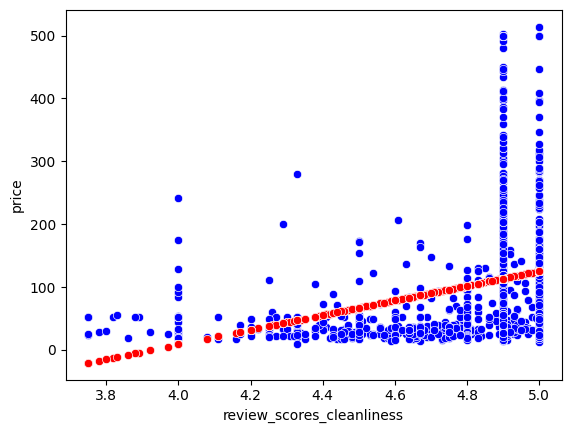

In [ ]:
#Visualizamos la grafica comparativa entre el total real y el total predecido
sns.scatterplot(x='review_scores_cleanliness', y='price', color="blue", data=Mexico_PR)
sns.scatterplot(x='review_scores_cleanliness', y='Predicciones_price_review_scores_cleanliness', color="red", data=Mexico_PR)
#sns.lineplot(x='review_scores_cleanliness', y='Predicciones_price_review_scores_cleanliness', color="red", data=Mexico_PR)

In [661]:
#Corroboramos cual es el coeficiente de determinacion de nuestro modelo
coef_Deter = model.score(vars_Indep, var_Dep)
resultados[("Private_room","price_review_scores_cleanliness","determinacion")] = coef_Deter
coef_Deter

0.08690038225990093

In [662]:
#Corroboramos cual es el coeficiente de correlacion de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
resultados[("Private_room","price_review_scores_cleanliness","correlacion")] = coef_Correl
coef_Correl

np.float64(0.2947887078229099)

**| price vs host_identity_verified**

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
vars_Indep = Mexico_PR[['host_identity_verified']]
var_Dep = Mexico_PR['price']

In [664]:
model = LinearRegression()
type(model)

sklearn.linear_model._base.LinearRegression

In [665]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=vars_Indep, y=var_Dep)

LinearRegression()

In [666]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_identity_verified'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-231.45863126]),
 'rank_': 1,
 'singular_': array([5.21741793]),
 'intercept_': np.float64(325.0000000000001)}

Modelo Matematico

In [667]:
#Coeficiente de determinación
model.score(vars_Indep, var_Dep)

0.13328076481862006

In [ ]:
#Predecimos los valores 
y_pred = model.predict(X=Mexico_PR[['host_identity_verified']])
y_pred

array([93.54136874, 93.54136874, 93.54136874, ..., 93.54136874,
       93.54136874, 93.54136874], shape=(1007,))

In [ ]:
#Insertamos la columna de predicciones en el dataframe
Mexico_PR.insert(32, 'Predicciones_price_host_identity_verified', y_pred)


<Axes: xlabel='host_identity_verified', ylabel='price'>

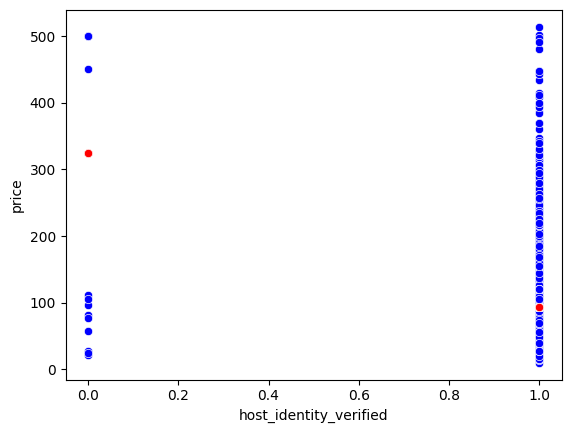

In [ ]:
#Visualizamos la grafica comparativa entre el total real y el total predecido
sns.scatterplot(x='host_identity_verified', y='price', color="blue", data=Mexico_PR)
sns.scatterplot(x='host_identity_verified', y='Predicciones_price_host_identity_verified', color="red", data=Mexico_PR)
#sns.lineplot(x='host_identity_verified', y='Predicciones_price_host_identity_verified', color="red", data=Mexico_PR)

In [671]:
#Corroboramos cual es el coeficiente de determinacion de nuestro modelo
coef_Deter = model.score(vars_Indep, var_Dep)
resultados[("Private_room","price_host_identity_verified","determinacion")] = coef_Deter
coef_Deter

0.13328076481862006

In [672]:
#Corroboramos cual es el coeficiente de correlacion de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
resultados[("Private_room","price_host_identity_verified","correlacion")] = coef_Correl
coef_Correl

np.float64(0.3650763821703892)

**| price vs instant_bookable**

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
vars_Indep = Mexico_PR[['instant_bookable']]
var_Dep = Mexico_PR['price']

In [674]:
model = LinearRegression()
type(model)

sklearn.linear_model._base.LinearRegression

In [675]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=vars_Indep, y=var_Dep)

LinearRegression()

In [676]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['instant_bookable'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([49.35854392]),
 'rank_': 1,
 'singular_': array([15.80171323]),
 'intercept_': np.float64(73.06768558951978)}

Modelo Matematico

In [677]:
#Coeficiente de determinación
model.score(vars_Indep, var_Dep)

0.055595865216627294

In [ ]:
#Predecimos los valores 
y_pred = model.predict(X=Mexico_PR[['instant_bookable']])
y_pred

array([ 73.06768559, 122.42622951,  73.06768559, ...,  73.06768559,
        73.06768559, 122.42622951], shape=(1007,))

In [ ]:
#Insertamos la columna de predicciones en el dataframe
Mexico_PR.insert(32, 'Predicciones_price_instant_bookable', y_pred)


<Axes: xlabel='instant_bookable', ylabel='price'>

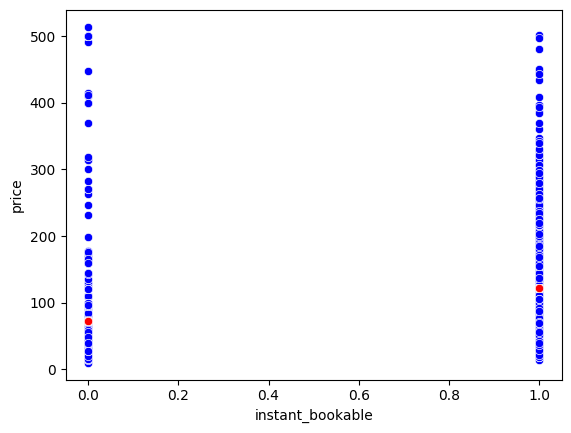

In [ ]:
#Visualizamos la grafica comparativa entre el total real y el total predecido
sns.scatterplot(x='instant_bookable', y='price', color="blue", data=Mexico_PR)
sns.scatterplot(x='instant_bookable', y='Predicciones_price_instant_bookable', color="red", data=Mexico_PR)
#sns.lineplot(x='instant_bookable', y='Predicciones_price_instant_bookable', color="red", data=Mexico_PR)

In [681]:
#Corroboramos cual es el coeficiente de determinacion de nuestro modelo
coef_Deter = model.score(vars_Indep, var_Dep)
resultados[("Private_room","price_instant_bookable","determinacion")] = coef_Deter
coef_Deter

0.055595865216627294

In [682]:
#Corroboramos cual es el coeficiente de correlacion de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
resultados[("Private_room","price_instant_bookable","correlacion")] = coef_Correl
coef_Correl

np.float64(0.23578775459431156)

**| price vs property_type**

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
vars_Indep = Mexico_PR[['property_type_encoded']]
var_Dep = Mexico_PR['price']

In [684]:
model = LinearRegression()
type(model)

sklearn.linear_model._base.LinearRegression

In [685]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=vars_Indep, y=var_Dep)

LinearRegression()

In [686]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['property_type_encoded'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([8.87420783]),
 'rank_': 1,
 'singular_': array([136.53603691]),
 'intercept_': np.float64(7.4633228968372265)}

Modelo Matematico

In [687]:
#Coeficiente de determinación
model.score(vars_Indep, var_Dep)

0.13417241586667383

In [ ]:
#Predecimos los valores 
y_pred = model.predict(X=Mexico_PR[['property_type_encoded']])
y_pred

array([96.20540124, 34.0859464 , 78.45698557, ..., 96.20540124,
       96.20540124, 96.20540124], shape=(1007,))

In [ ]:
#Insertamos la columna de predicciones en el dataframe
Mexico_PR.insert(32, 'Predicciones_price_property_type', y_pred)


<Axes: xlabel='property_type_encoded', ylabel='price'>

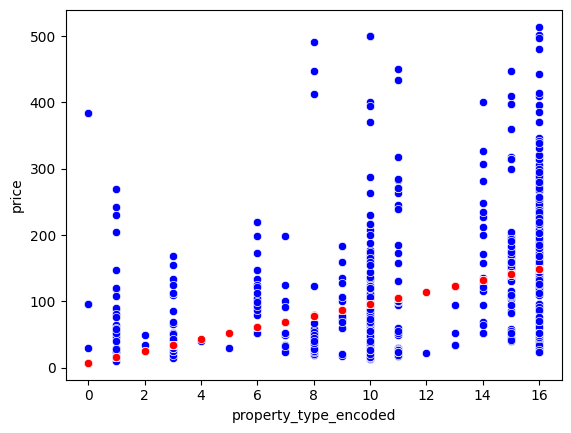

In [ ]:
#Visualizamos la grafica comparativa entre el total real y el total predecido
sns.scatterplot(x='property_type_encoded', y='price', color="blue", data=Mexico_PR)
sns.scatterplot(x='property_type_encoded', y='Predicciones_price_property_type', color="red", data=Mexico_PR)
#sns.lineplot(x='property_type_encoded', y='Predicciones_price_property_type', color="red", data=Mexico_PR)

In [691]:
#Corroboramos cual es el coeficiente de determinacion de nuestro modelo
coef_Deter = model.score(vars_Indep, var_Dep)
resultados[("Private_room","price_property_type","determinacion")] = coef_Deter
coef_Deter

0.13417241586667383

In [692]:
#Corroboramos cual es el coeficiente de correlacion de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
resultados[("Private_room","price_property_type","correlacion")] = coef_Correl
coef_Correl

np.float64(0.3662955307762761)

In [ ]:
Mexico_PR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 58 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   last_scraped                                  1007 non-null   object 
 1   source                                        1007 non-null   object 
 2   name                                          1007 non-null   object 
 3   description                                   1007 non-null   object 
 4   neighborhood_overview                         1007 non-null   object 
 5   host_name                                     1007 non-null   object 
 6   host_since                                    1007 non-null   object 
 7   host_location                                 1007 non-null   object 
 8   host_about                                    1007 non-null   object 
 9   host_response_time                            1007 non-null   o

# Shared Room

In [ ]:
#Cargar desde un archivo .csv
Mexico_SR = pd.read_csv('room_type_México/Shared_room_México.csv')

Mexico_SR.head()

,last_scraped,source,name,description,neighborhood_overview,host_name,host_since,host_location,host_about,host_response_time,...,availability_365,number_of_reviews,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,2024-09-23,city scrape,Bedway Athens Hostel (Bed in female dormitory),"Bedway Athens Hostel is a brand new, modern Ho...",No disponible,Bedway Athens,2018-08-27,"Athens, Greece",No disponible,within a day,...,335,14.0,0.0,4.21,4.50,4.21,4.50,4.71,4.57,0.19
1,2024-09-23,city scrape,Bedway Athens Hostel (Bed in mixed dormitory),"Bedway Athens Hostel is a brand new, modern Ho...",No disponible,Bedway Athens,2018-08-27,"Athens, Greece",No disponible,within a day,...,174,33.0,1.0,4.70,4.61,4.55,4.76,4.82,4.88,0.45
2,2024-09-23,city scrape,Bedway Athens Hostel (Bed in mixed dormitory),"Bedway Athens Hostel is a brand new, modern Ho...",No disponible,Bedway Athens,2018-08-27,"Athens, Greece",No disponible,within a day,...,171,35.0,0.0,4.40,4.60,4.43,4.57,4.51,4.60,0.61
3,2024-09-23,city scrape,Bedway Athens Hostel (Bed in mixed dormitory),"Bedway Athens Hostel is a brand new, modern Ho...",No disponible,Bedway Athens,2018-08-27,"Athens, Greece",No disponible,within a day,...,179,8.0,0.0,3.88,3.88,3.88,4.90,3.88,3.88,0.20
4,2024-09-23,city scrape,Bedway Athens Hostel (Bed in female dormitory),"Bedway Athens Hostel is a brand new, modern Ho...",No disponible,Bedway Athens,2018-08-27,"Athens, Greece",No disponible,within a day,...,179,1.0,0.0,4.00,5.00,4.80,5.00,5.00,4.00,0.02


In [ ]:
Mexico_SR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 50 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   last_scraped                 55 non-null     object 
 1   source                       55 non-null     object 
 2   name                         55 non-null     object 
 3   description                  55 non-null     object 
 4   neighborhood_overview        55 non-null     object 
 5   host_name                    55 non-null     object 
 6   host_since                   55 non-null     object 
 7   host_location                55 non-null     object 
 8   host_about                   55 non-null     object 
 9   host_response_time           55 non-null     object 
 10  host_is_superhost            55 non-null     object 
 11  host_verifications           55 non-null     object 
 12  host_identity_verified       55 non-null     object 
 13  neighbourhood_cleansed

In [ ]:
# Variables binarias: Convertir "yes" -> 1, "no" -> 0
binary_vars = ["host_is_superhost", "host_identity_verified", "instant_bookable"]
for var in binary_vars:
    Mexico_SR[var] = Mexico_SR[var].map({'t': 1, 'f': 0})  # 't' (true) y 'f' (false) en el dataset

In [ ]:
# Convertir "property_type" en variables numéricas label encoding
le = LabelEncoder()
Mexico_SR["property_type_encoded"] = le.fit_transform(Mexico_SR["property_type"])

In [698]:
comparaciones = [
    ("price", "host_acceptance_rate"),
    ("price", "host_is_superhost"),
    ("accommodates", "bathrooms"),
    ("price", "review_scores_cleanliness"),
    ("price", "host_identity_verified"),
    ("price", "instant_bookable")
]

<Axes: xlabel='host_acceptance_rate', ylabel='price'>

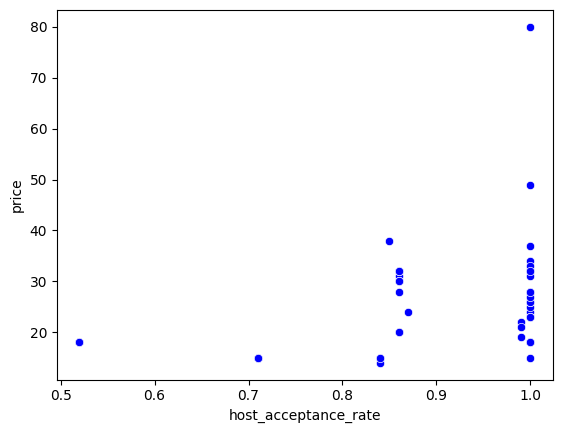

In [ ]:
#Imprimimos el scater plot entre la variable dependiente e independiente 
#para observar el comportamiento en su dispersión

#(price vs host_acceptance_rate)
sns.scatterplot(x='host_acceptance_rate', y='price', color="blue", data=Mexico_SR)


<Axes: xlabel='host_is_superhost', ylabel='price'>

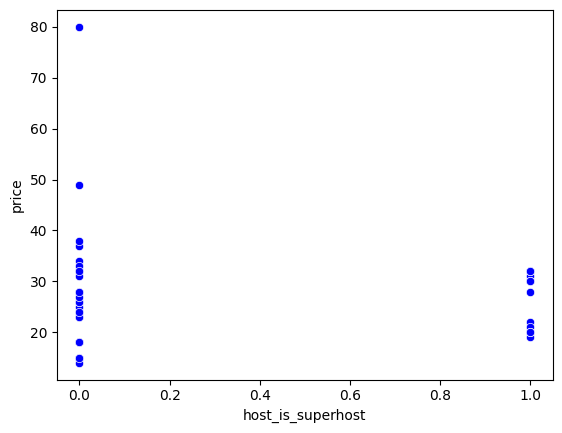

In [ ]:
#(price vs host_is_superhost)
sns.scatterplot(x='host_is_superhost', y='price', color="blue", data=Mexico_SR)

<Axes: xlabel='bathrooms', ylabel='accommodates'>

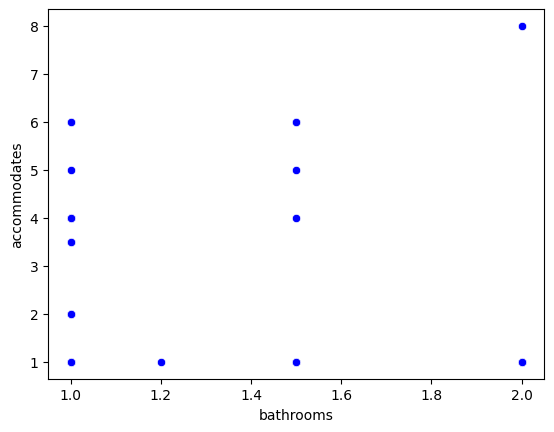

In [ ]:
#(accommodates vs bathrooms)
sns.scatterplot(x='bathrooms', y='accommodates', color="blue", data=Mexico_SR)


<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

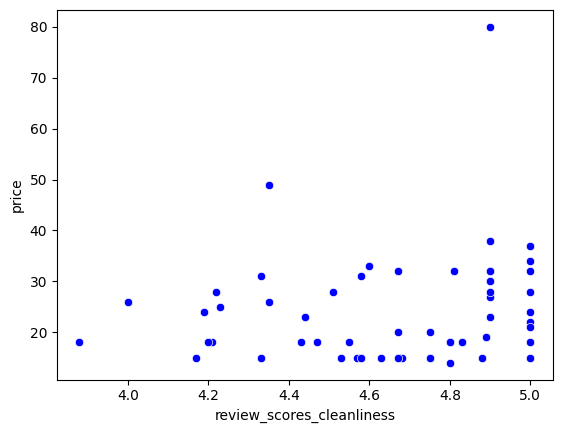

In [ ]:
#(price vs review_scores_cleanliness)
sns.scatterplot(x='review_scores_cleanliness', y='price', color="blue", data=Mexico_SR)

<Axes: xlabel='host_identity_verified', ylabel='price'>

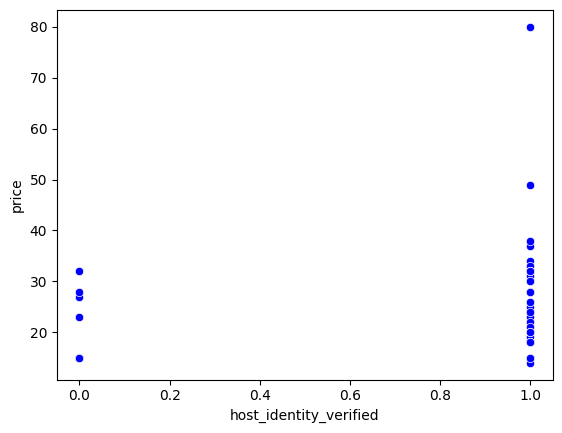

In [ ]:
#(price vs host_identity_verified)
sns.scatterplot(x='host_identity_verified', y='price', color="blue", data=Mexico_SR)

<Axes: xlabel='instant_bookable', ylabel='price'>

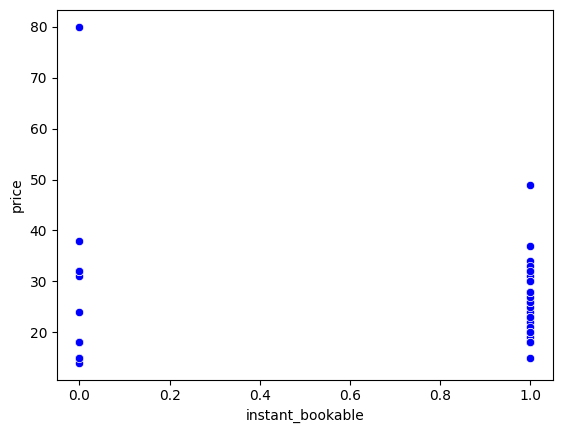

In [ ]:
#(price vs instant_bookable)
sns.scatterplot(x='instant_bookable', y='price', color="blue", data=Mexico_SR)

<Axes: xlabel='property_type_encoded', ylabel='price'>

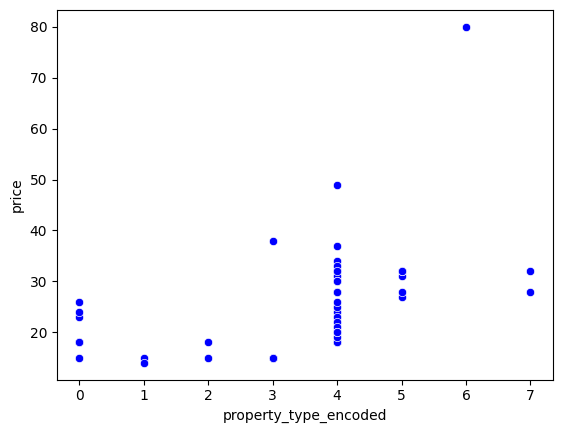

In [ ]:
#(price vs property_type)
sns.scatterplot(x='property_type_encoded', y='price', color="blue", data=Mexico_SR)


**| price vs host_acceptance_rate**

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
vars_Indep = Mexico_SR[['host_acceptance_rate']]
var_Dep = Mexico_SR['price'] 

In [707]:
model = LinearRegression()
type(model)

sklearn.linear_model._base.LinearRegression

In [708]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=vars_Indep, y=var_Dep)

LinearRegression()

In [709]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([27.93028453]),
 'rank_': 1,
 'singular_': array([1.25832067]),
 'intercept_': np.float64(0.638945219290477)}

Modelo Matematico

In [710]:
#Coeficiente de determinación
model.score(vars_Indep, var_Dep)

0.1951571925120219

In [ ]:
#Predecimos los valores 
y_pred = model.predict(X=Mexico_SR[['host_acceptance_rate']])
y_pred

array([15.16269317, 15.16269317, 15.16269317, 15.16269317, 15.16269317,
       15.16269317, 15.16269317, 15.16269317, 20.46944723, 20.46944723,
       28.56922974, 28.56922974, 28.56922974, 28.56922974, 28.56922974,
       28.56922974, 20.46944723, 20.46944723, 20.46944723, 20.46944723,
       20.46944723, 20.46944723, 28.56922974, 28.56922974, 28.56922974,
       28.56922974, 28.56922974, 28.56922974, 28.56922974, 28.56922974,
       28.2899269 , 28.2899269 , 28.2899269 , 28.56922974, 24.65898991,
       28.56922974, 28.56922974, 28.56922974, 24.65898991, 24.65898991,
       24.65898991, 24.65898991, 24.10038422, 28.56922974, 28.56922974,
       28.56922974, 28.56922974, 24.65898991, 24.10038422, 24.93829276,
       24.65898991, 24.65898991, 24.10038422, 24.37968707, 24.65898991])

In [ ]:
#Insertamos la columna de predicciones en el dataframe
Mexico_SR.insert(22, 'Predicciones_price_host_acceptance_rate', y_pred)


<Axes: xlabel='host_acceptance_rate', ylabel='price'>

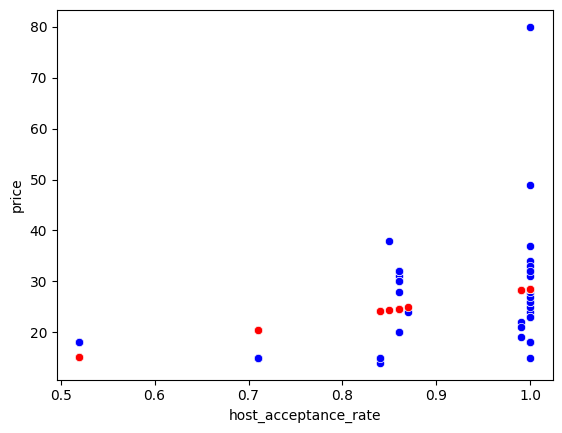

In [ ]:
#Visualizamos la grafica comparativa entre el total real y el total predecido
sns.scatterplot(x='host_acceptance_rate', y='price', color="blue", data=Mexico_SR)
sns.scatterplot(x='host_acceptance_rate', y='Predicciones_price_host_acceptance_rate', color="red", data=Mexico_SR)
#sns.lineplot(x='host_acceptance_rate', y='Predicciones_price_host_acceptance_rate', color="red", data=Mexico_SR)

In [714]:
#Corroboramos cual es el coeficiente de determinacion de nuestro modelo
coef_Deter = model.score(vars_Indep, var_Dep)
resultados[("Shared_room","price_host_acceptance_rate","determinacion")] = coef_Deter
coef_Deter

0.1951571925120219

In [715]:
#Corroboramos cual es el coeficiente de correlacion de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
resultados[("Shared_room","price_host_acceptance_rate","correlacion")] = coef_Correl
coef_Correl

np.float64(0.4417659929329349)

**| price vs host_is_superhost**

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
vars_Indep = Mexico_SR[['host_is_superhost']]
var_Dep = Mexico_SR['price'] 

In [717]:
model = LinearRegression()
type(model)

sklearn.linear_model._base.LinearRegression

In [718]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=vars_Indep, y=var_Dep)

LinearRegression()

In [719]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_is_superhost'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([2.57945736]),
 'rank_': 1,
 'singular_': array([3.06297538]),
 'intercept_': np.float64(23.83720930232558)}

Modelo Matematico

In [720]:
#Coeficiente de determinación
model.score(vars_Indep, var_Dep)

0.00986267904585958

In [ ]:
#Predecimos los valores 
y_pred = model.predict(X=Mexico_SR[['host_is_superhost']])
y_pred

array([23.8372093 , 23.8372093 , 23.8372093 , 23.8372093 , 23.8372093 ,
       23.8372093 , 23.8372093 , 23.8372093 , 23.8372093 , 23.8372093 ,
       23.8372093 , 23.8372093 , 23.8372093 , 23.8372093 , 23.8372093 ,
       23.8372093 , 23.8372093 , 23.8372093 , 23.8372093 , 23.8372093 ,
       23.8372093 , 23.8372093 , 23.8372093 , 23.8372093 , 23.8372093 ,
       23.8372093 , 23.8372093 , 23.8372093 , 23.8372093 , 23.8372093 ,
       26.41666667, 26.41666667, 26.41666667, 23.8372093 , 26.41666667,
       23.8372093 , 23.8372093 , 23.8372093 , 26.41666667, 26.41666667,
       26.41666667, 26.41666667, 23.8372093 , 23.8372093 , 23.8372093 ,
       23.8372093 , 23.8372093 , 26.41666667, 23.8372093 , 23.8372093 ,
       26.41666667, 26.41666667, 23.8372093 , 23.8372093 , 26.41666667])

In [ ]:
#Insertamos la columna de predicciones en el dataframe
Mexico_SR.insert(10, 'Predicciones_price_host_is_superhost', y_pred)


<Axes: xlabel='host_is_superhost', ylabel='price'>

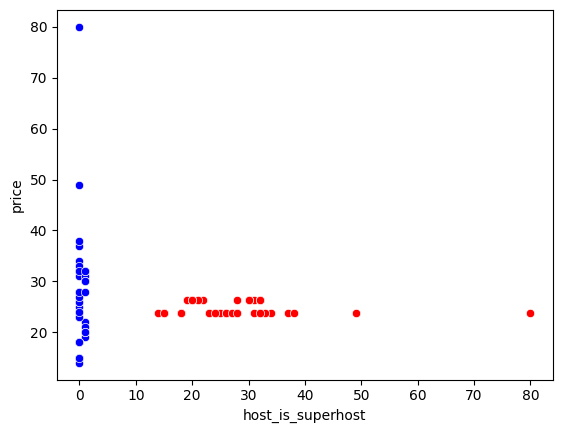

In [ ]:
#Visualizamos la grafica comparativa entre el total real y el total predecido
sns.scatterplot(x='host_is_superhost', y='price', color="blue", data=Mexico_SR)
sns.scatterplot(x='price', y='Predicciones_price_host_is_superhost', color="red", data=Mexico_SR)
#sns.lineplot(x='price', y='Predicciones_price_host_is_superhost', color="red", data=Mexico_SR)

In [724]:
#Corroboramos cual es el coeficiente de determinacion de nuestro modelo
coef_Deter = model.score(vars_Indep, var_Dep)
resultados[("Shared_room","price_host_is_superhost","determinacion")] = coef_Deter
coef_Deter

0.00986267904585958

In [725]:
#Corroboramos cual es el coeficiente de correlacion de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
resultados[("Shared_room","price_host_is_superhost","correlacion")] = coef_Correl
coef_Correl

np.float64(0.0993110217743206)

**| accommodates vs bathrooms**

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
vars_Indep = Mexico_SR[['bathrooms']]
var_Dep = Mexico_SR['accommodates'] 

In [727]:
model = LinearRegression()
type(model)

sklearn.linear_model._base.LinearRegression

In [728]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=vars_Indep, y=var_Dep)

LinearRegression()

In [729]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['bathrooms'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.34732505]),
 'rank_': 1,
 'singular_': array([2.37662863]),
 'intercept_': np.float64(1.915534668125925)}

Modelo Matematico

In [730]:
#Coeficiente de determinación
model.score(vars_Indep, var_Dep)

0.0035936494110888617

In [ ]:
#Predecimos los valores 
y_pred = model.predict(X=Mexico_SR[['bathrooms']])
y_pred

array([2.26285972, 2.26285972, 2.26285972, 2.26285972, 2.26285972,
       2.26285972, 2.26285972, 2.26285972, 2.26285972, 2.26285972,
       2.26285972, 2.26285972, 2.26285972, 2.26285972, 2.26285972,
       2.43652224, 2.26285972, 2.26285972, 2.26285972, 2.26285972,
       2.26285972, 2.26285972, 2.26285972, 2.26285972, 2.26285972,
       2.26285972, 2.61018477, 2.26285972, 2.26285972, 2.26285972,
       2.61018477, 2.43652224, 2.43652224, 2.26285972, 2.26285972,
       2.26285972, 2.26285972, 2.26285972, 2.43652224, 2.26285972,
       2.43652224, 2.43652224, 2.43652224, 2.26285972, 2.26285972,
       2.26285972, 2.26285972, 2.43652224, 2.43652224, 2.33232473,
       2.61018477, 2.61018477, 2.43652224, 2.26285972, 2.61018477])

In [ ]:
#Insertamos la columna de predicciones en el dataframe
Mexico_SR.insert(29, 'Predicciones_bathrooms_accommodates', y_pred)


<Axes: xlabel='bathrooms', ylabel='accommodates'>

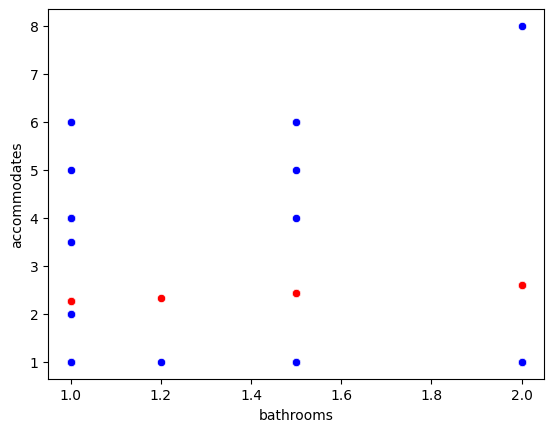

In [ ]:
#Visualizamos la grafica comparativa entre el total real y el total predecido
sns.scatterplot(x='bathrooms', y='accommodates', color="blue", data=Mexico_SR)
sns.scatterplot(x='bathrooms', y='Predicciones_bathrooms_accommodates', color="red", data=Mexico_SR)
#sns.lineplot(x='bathrooms', y='Predicciones_bathrooms_accommodates', color="red", data=Mexico_SR)

In [734]:
#Corroboramos cual es el coeficiente de determinacion de nuestro modelo
coef_Deter = model.score(vars_Indep, var_Dep)
resultados[("Shared_room","bathrooms_accommodates","determinacion")] = coef_Deter
coef_Deter

0.0035936494110888617

In [735]:
#Corroboramos cual es el coeficiente de correlacion de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
resultados[("Shared_room","bathrooms_accommodates","correlacion")] = coef_Correl
coef_Correl

np.float64(0.05994705506602357)

**| price vs review_scores_cleanliness**

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
vars_Indep = Mexico_SR[['review_scores_cleanliness']]
var_Dep = Mexico_SR['price'] 

In [737]:
model = LinearRegression()
type(model)

sklearn.linear_model._base.LinearRegression

In [738]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=vars_Indep, y=var_Dep)

LinearRegression()

In [739]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([6.3041188]),
 'rank_': 1,
 'singular_': array([2.17454697]),
 'intercept_': np.float64(-4.971462572478828)}

Modelo Matematico

In [740]:
#Coeficiente de determinación
model.score(vars_Indep, var_Dep)

0.029691869637565094

In [ ]:
#Predecimos los valores 
y_pred = model.predict(X=Mexico_SR[['review_scores_cleanliness']])
y_pred

array([21.56887756, 23.71227795, 22.95578369, 19.48851836, 25.28830765,
       21.50583637, 25.47743121, 23.20794845, 24.97310171, 23.83836033,
       22.45145419, 21.44279518, 21.63191875, 21.69495993, 22.45145419,
       20.24501261, 24.21660745, 23.58619557, 23.90140151, 22.32537181,
       25.79263715, 24.53181339, 26.54913141, 26.54913141, 26.54913141,
       23.90140151, 23.4601132 , 24.02748389, 23.01882488, 25.91871953,
       25.85567834, 26.54913141, 26.54913141, 24.46877221, 24.46877221,
       25.28830765, 26.54913141, 25.28830765, 25.35134884, 24.97310171,
       22.32537181, 24.46877221, 21.31671281, 25.91871953, 25.91871953,
       26.54913141, 25.91871953, 25.91871953, 25.28830765, 26.54913141,
       25.91871953, 25.91871953, 26.54913141, 25.91871953, 25.91871953])

In [ ]:
#Insertamos la columna de predicciones en el dataframe
Mexico_SR.insert(32, 'Predicciones_price_review_scores_cleanliness', y_pred)


<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

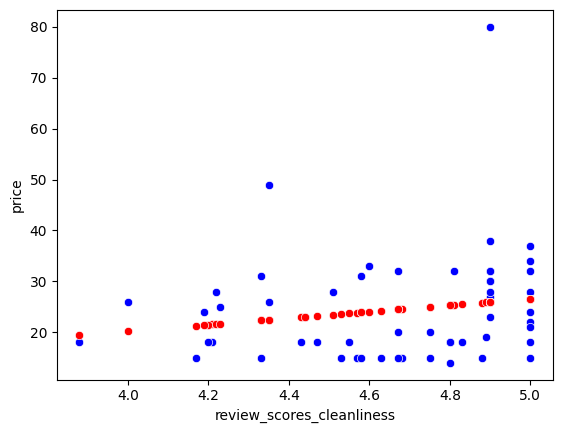

In [ ]:
#Visualizamos la grafica comparativa entre el total real y el total predecido
sns.scatterplot(x='review_scores_cleanliness', y='price', color="blue", data=Mexico_SR)
sns.scatterplot(x='review_scores_cleanliness', y='Predicciones_price_review_scores_cleanliness', color="red", data=Mexico_SR)
#sns.lineplot(x='review_scores_cleanliness', y='Predicciones_price_review_scores_cleanliness', color="red", data=Mexico_SR)

In [744]:
#Corroboramos cual es el coeficiente de determinacion de nuestro modelo
coef_Deter = model.score(vars_Indep, var_Dep)
resultados[("Shared_room","price_review_scores_cleanliness","determinacion")] = coef_Deter
coef_Deter

0.029691869637565094

In [745]:
#Corroboramos cual es el coeficiente de correlacion de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
resultados[("Shared_room","price_review_scores_cleanliness","correlacion")] = coef_Correl
coef_Correl

np.float64(0.172313289207667)

**| price vs host_identity_verified**

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
vars_Indep = Mexico_SR[['host_identity_verified']]
var_Dep = Mexico_SR['price'] 

In [747]:
model = LinearRegression()
type(model)

sklearn.linear_model._base.LinearRegression

In [748]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=vars_Indep, y=var_Dep)

LinearRegression()

In [749]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_identity_verified'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([6.69379845]),
 'rank_': 1,
 'singular_': array([3.06297538]),
 'intercept_': np.float64(19.166666666666668)}

Modelo Matematico

In [750]:
#Coeficiente de determinación
model.score(vars_Indep, var_Dep)

0.06641764245649662

In [ ]:
#Predecimos los valores 
y_pred = model.predict(X=Mexico_SR[['host_identity_verified']])
y_pred

array([25.86046512, 25.86046512, 25.86046512, 25.86046512, 25.86046512,
       25.86046512, 25.86046512, 25.86046512, 19.16666667, 19.16666667,
       25.86046512, 25.86046512, 25.86046512, 25.86046512, 25.86046512,
       25.86046512, 19.16666667, 19.16666667, 19.16666667, 19.16666667,
       19.16666667, 19.16666667, 25.86046512, 25.86046512, 25.86046512,
       25.86046512, 25.86046512, 25.86046512, 25.86046512, 25.86046512,
       25.86046512, 25.86046512, 25.86046512, 25.86046512, 25.86046512,
       25.86046512, 25.86046512, 25.86046512, 25.86046512, 25.86046512,
       25.86046512, 25.86046512, 25.86046512, 19.16666667, 19.16666667,
       19.16666667, 19.16666667, 25.86046512, 25.86046512, 25.86046512,
       25.86046512, 25.86046512, 25.86046512, 25.86046512, 25.86046512])

In [ ]:
#Insertamos la columna de predicciones en el dataframe
Mexico_SR.insert(32, 'Predicciones_price_host_identity_verified', y_pred)


<Axes: xlabel='host_identity_verified', ylabel='price'>

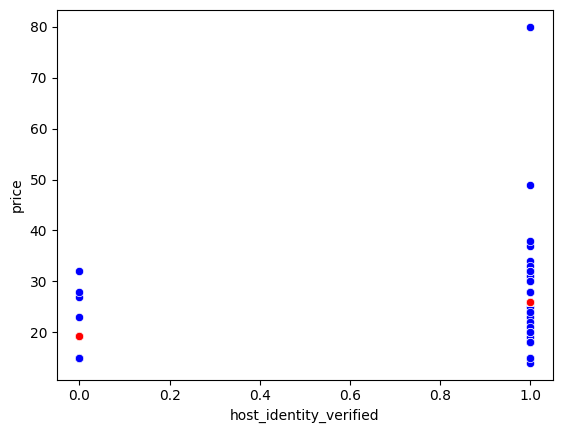

In [ ]:
#Visualizamos la grafica comparativa entre el total real y el total predecido
sns.scatterplot(x='host_identity_verified', y='price', color="blue", data=Mexico_SR)
sns.scatterplot(x='host_identity_verified', y='Predicciones_price_host_identity_verified', color="red", data=Mexico_SR)
#sns.lineplot(x='host_identity_verified', y='Predicciones_price_host_identity_verified', color="red", data=Mexico_SR)

In [754]:
#Corroboramos cual es el coeficiente de determinacion de nuestro modelo
coef_Deter = model.score(vars_Indep, var_Dep)
resultados[("Shared_room","price_host_identity_verified","determinacion")] = coef_Deter
coef_Deter

0.06641764245649662

In [755]:
#Corroboramos cual es el coeficiente de correlacion de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
resultados[("Shared_room","price_host_identity_verified","correlacion")] = coef_Correl
coef_Correl

np.float64(0.25771620526559175)

**| price vs instant_bookable**

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
vars_Indep = Mexico_SR[['instant_bookable']]
var_Dep = Mexico_SR['price'] 

In [757]:
model = LinearRegression()
type(model)

sklearn.linear_model._base.LinearRegression

In [758]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=vars_Indep, y=var_Dep)

LinearRegression()

In [759]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['instant_bookable'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([4.18700265]),
 'rank_': 1,
 'singular_': array([3.70257895]),
 'intercept_': np.float64(22.19230769230769)}

Modelo Matematico

In [760]:
#Coeficiente de determinación
model.score(vars_Indep, var_Dep)

0.03797224803366006

In [ ]:
#Predecimos los valores 
y_pred = model.predict(X=Mexico_SR[['instant_bookable']])
y_pred

array([22.19230769, 22.19230769, 22.19230769, 22.19230769, 22.19230769,
       22.19230769, 22.19230769, 22.19230769, 22.19230769, 22.19230769,
       26.37931034, 26.37931034, 26.37931034, 26.37931034, 26.37931034,
       26.37931034, 22.19230769, 22.19230769, 22.19230769, 22.19230769,
       22.19230769, 22.19230769, 26.37931034, 26.37931034, 26.37931034,
       26.37931034, 26.37931034, 26.37931034, 26.37931034, 22.19230769,
       26.37931034, 26.37931034, 26.37931034, 26.37931034, 26.37931034,
       26.37931034, 26.37931034, 26.37931034, 22.19230769, 26.37931034,
       22.19230769, 22.19230769, 22.19230769, 26.37931034, 26.37931034,
       26.37931034, 26.37931034, 22.19230769, 22.19230769, 22.19230769,
       26.37931034, 26.37931034, 22.19230769, 22.19230769, 26.37931034])

In [ ]:
#Insertamos la columna de predicciones en el dataframe
Mexico_SR.insert(32, 'Predicciones_price_instant_bookable', y_pred)


<Axes: xlabel='instant_bookable', ylabel='price'>

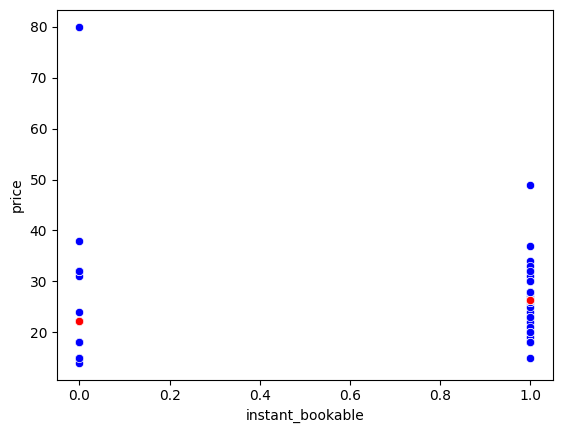

In [ ]:
#Visualizamos la grafica comparativa entre el total real y el total predecido
sns.scatterplot(x='instant_bookable', y='price', color="blue", data=Mexico_SR)
sns.scatterplot(x='instant_bookable', y='Predicciones_price_instant_bookable', color="red", data=Mexico_SR)
#sns.lineplot(x='instant_bookable', y='Predicciones_price_instant_bookable', color="red", data=Mexico_SR)

In [764]:
#Corroboramos cual es el coeficiente de determinacion de nuestro modelo
coef_Deter = model.score(vars_Indep, var_Dep)
resultados[("Shared_room","price_instant_bookable","determinacion")] = coef_Deter
coef_Deter

0.03797224803366006

In [765]:
#Corroboramos cual es el coeficiente de correlacion de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
resultados[("Shared_room","price_instant_bookable","correlacion")] = coef_Correl
coef_Correl

np.float64(0.1948646916033278)

**| price vs property_type**

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
vars_Indep = Mexico_SR[['property_type_encoded']]
var_Dep = Mexico_SR['price']

In [767]:
model = LinearRegression()
type(model)

sklearn.linear_model._base.LinearRegression

In [768]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=vars_Indep, y=var_Dep)

LinearRegression()

In [769]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['property_type_encoded'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([2.88008082]),
 'rank_': 1,
 'singular_': array([12.3685819]),
 'intercept_': np.float64(14.660090325647728)}

Modelo Matematico

In [770]:
#Coeficiente de determinación
model.score(vars_Indep, var_Dep)

0.20049352339504622

In [ ]:
#Predecimos los valores 
y_pred = model.predict(X=Mexico_SR[['property_type_encoded']])
y_pred

array([20.42025196, 26.1804136 , 26.1804136 , 26.1804136 , 26.1804136 ,
       26.1804136 , 26.1804136 , 26.1804136 , 23.30033278, 23.30033278,
       26.1804136 , 26.1804136 , 26.1804136 , 26.1804136 , 14.66009033,
       26.1804136 , 23.30033278, 23.30033278, 23.30033278, 23.30033278,
       23.30033278, 23.30033278, 26.1804136 , 26.1804136 , 26.1804136 ,
       26.1804136 , 26.1804136 , 26.1804136 , 26.1804136 , 31.94057523,
       26.1804136 , 26.1804136 , 26.1804136 , 14.66009033, 26.1804136 ,
       14.66009033, 14.66009033, 14.66009033, 34.82065605, 26.1804136 ,
       29.06049441, 29.06049441, 17.54017114, 14.66009033, 29.06049441,
       29.06049441, 29.06049441, 26.1804136 , 17.54017114, 14.66009033,
       26.1804136 , 34.82065605, 20.42025196, 23.30033278, 26.1804136 ])

In [ ]:
#Insertamos la columna de predicciones en el dataframe
Mexico_SR.insert(32, 'Predicciones_price_property_type', y_pred)


<Axes: xlabel='property_type_encoded', ylabel='price'>

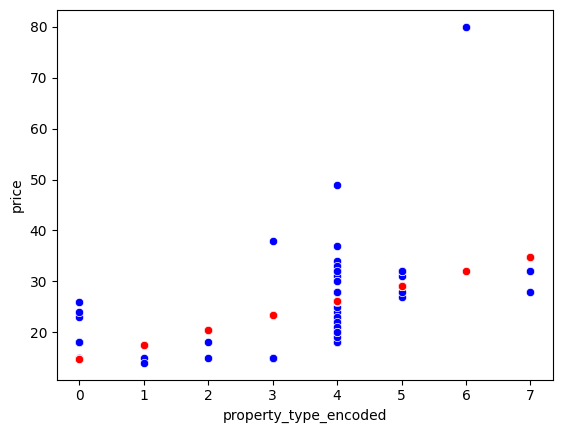

In [ ]:
#Visualizamos la grafica comparativa entre el total real y el total predecido
sns.scatterplot(x='property_type_encoded', y='price', color="blue", data=Mexico_SR)
sns.scatterplot(x='property_type_encoded', y='Predicciones_price_property_type', color="red", data=Mexico_SR)
#sns.lineplot(x='property_type_encoded', y='Predicciones_price_property_type', color="red", data=Mexico_SR)

In [774]:
#Corroboramos cual es el coeficiente de determinacion de nuestro modelo
coef_Deter = model.score(vars_Indep, var_Dep)
resultados[("Shared_room","price_property_type","determinacion")] = coef_Deter
coef_Deter

0.20049352339504622

In [775]:
#Corroboramos cual es el coeficiente de correlacion de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
resultados[("Shared_room","price_property_type","correlacion")] = coef_Correl
coef_Correl

np.float64(0.44776503145628316)

In [ ]:
Mexico_SR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 58 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   last_scraped                                  55 non-null     object 
 1   source                                        55 non-null     object 
 2   name                                          55 non-null     object 
 3   description                                   55 non-null     object 
 4   neighborhood_overview                         55 non-null     object 
 5   host_name                                     55 non-null     object 
 6   host_since                                    55 non-null     object 
 7   host_location                                 55 non-null     object 
 8   host_about                                    55 non-null     object 
 9   host_response_time                            55 non-null     objec

# Tabla de coeficientes de determinación y correlación

In [777]:
filas = []
for (dataset, comparacion, tipo), valor in resultados.items():
    filas.append({"Dataset": dataset, "Comparación": comparacion, "Tipo": tipo, "Valor": valor})

# Crear DataFrame
df = pd.DataFrame(filas)

# Mostrar la tabla con formato pivotado
df_pivot = df.pivot(index=["Dataset", "Comparación"], columns="Tipo", values="Valor")
print(df_pivot)

Tipo                                            correlacion  determinacion
Dataset        Comparación                                                
Entire_homeapt price_host_identity_verified        0.016078       0.000259
               price_host_is_superhost             0.117064       0.013704
               price_instant_bookable              0.070483       0.004968
               price_property_type                 0.055510       0.003081
               price_review_scores_cleanliness     0.155438       0.024161
Hotel_room     bathrooms_accommodates              0.548832       0.301217
               price_host_acceptance_rate          0.228732       0.052318
               price_host_identity_verified        0.000000       0.000000
               price_host_is_superhost             0.304569       0.092762
               price_instant_bookable              0.240711       0.057942
               price_property_type                 0.324378       0.105221
               price_revi